In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import seaborn as sns
import cartopy.crs as ccrs
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap

# TIME SERIES PLOTS

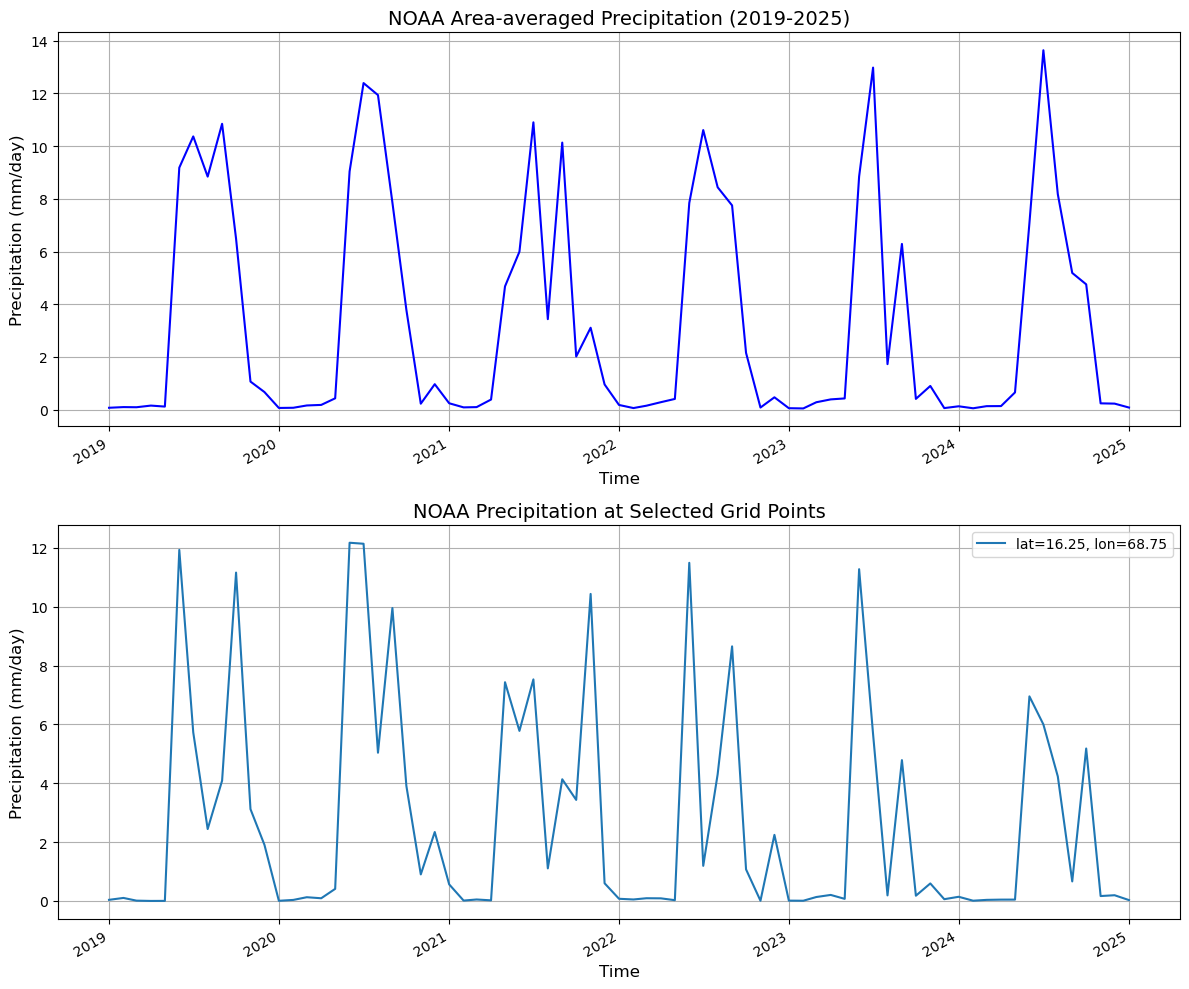

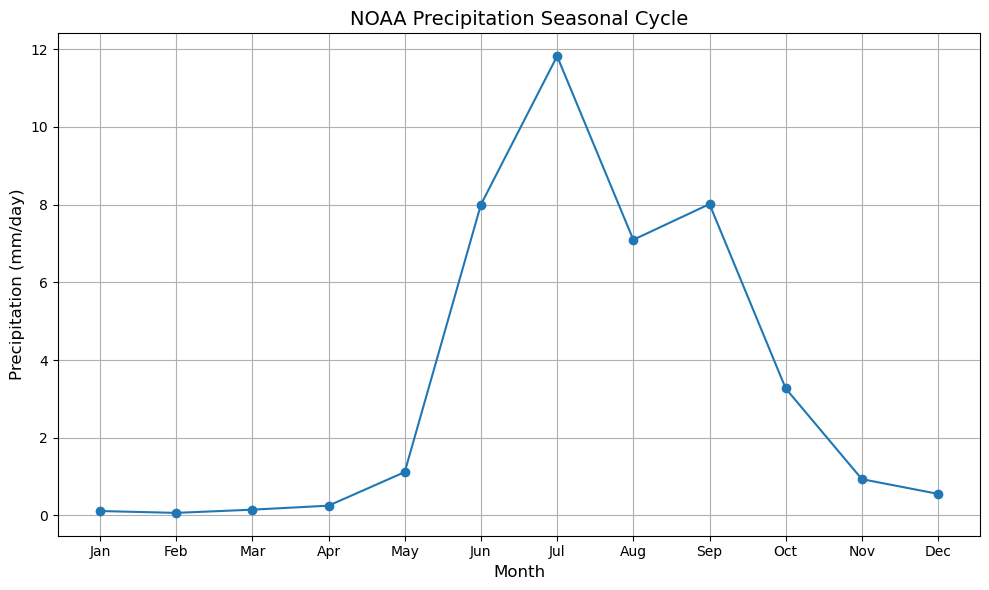

NOAA Precipitation plots created successfully!


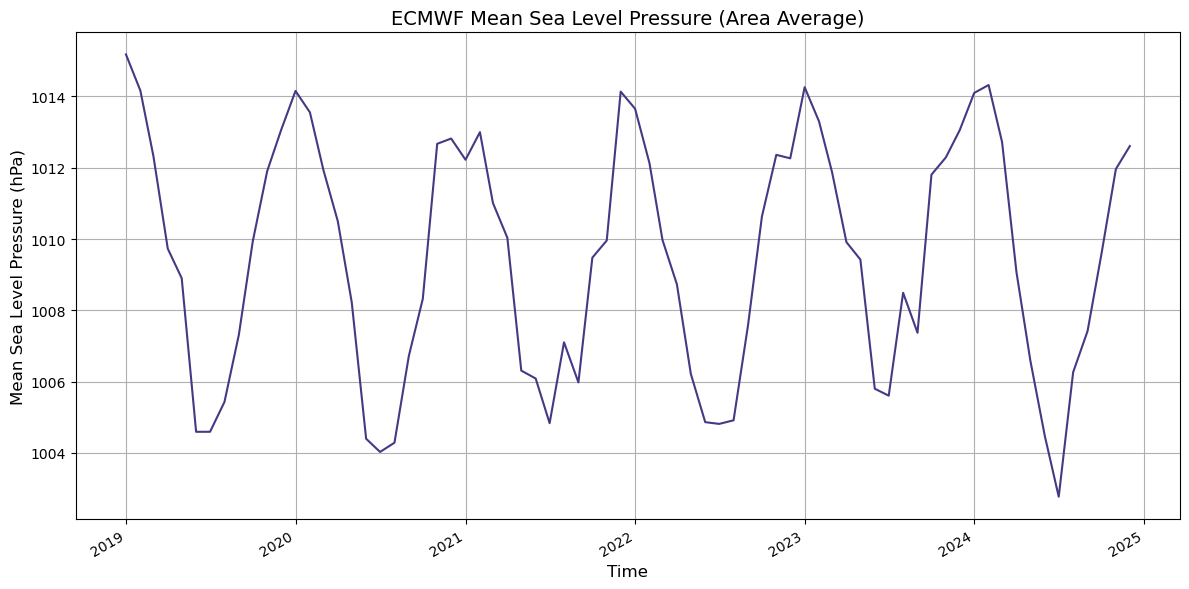

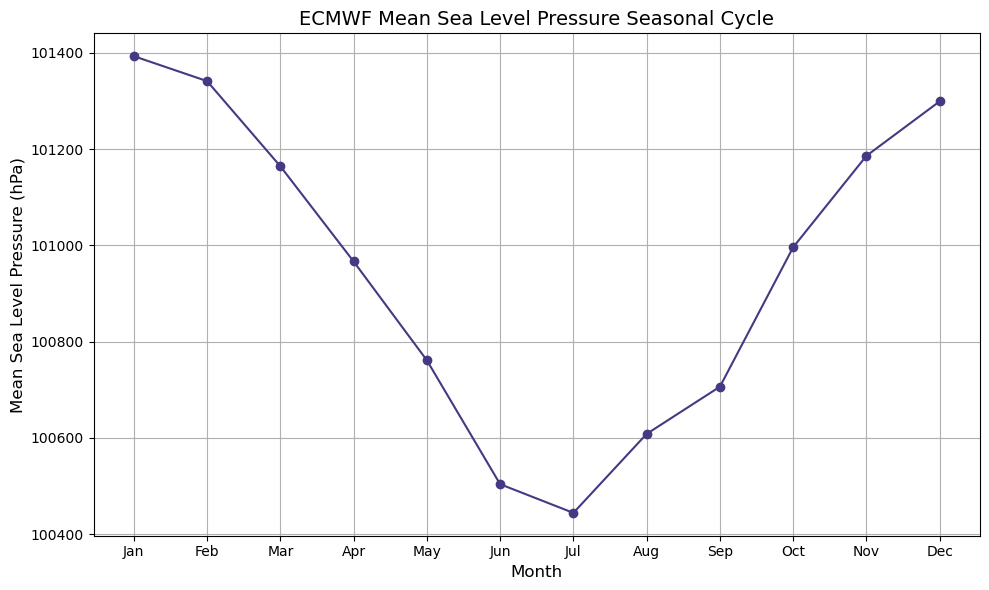

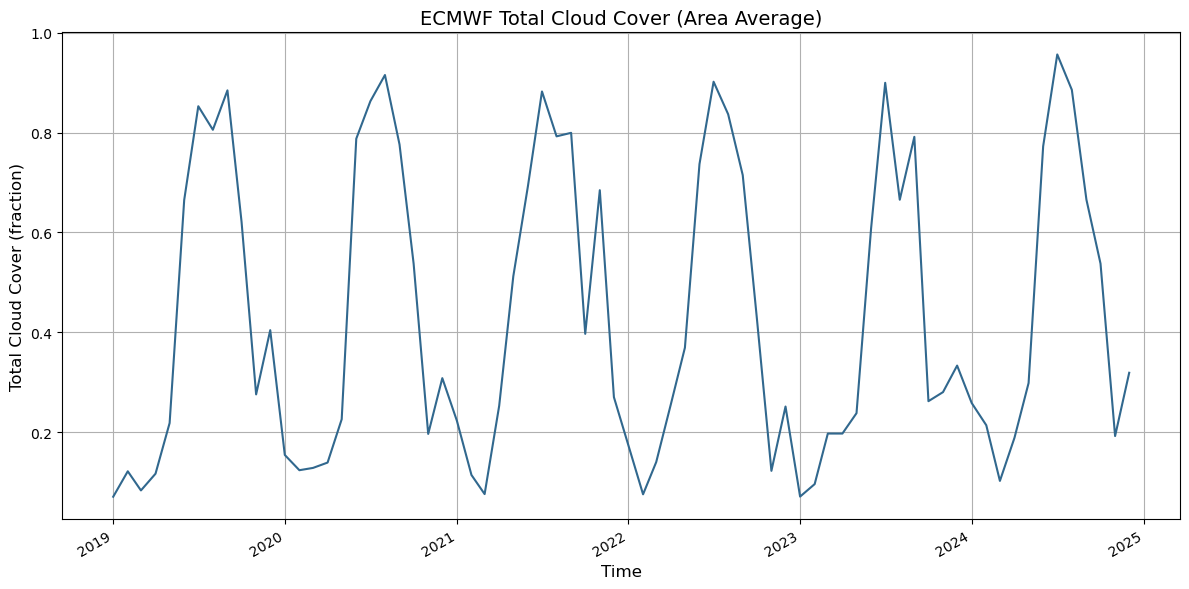

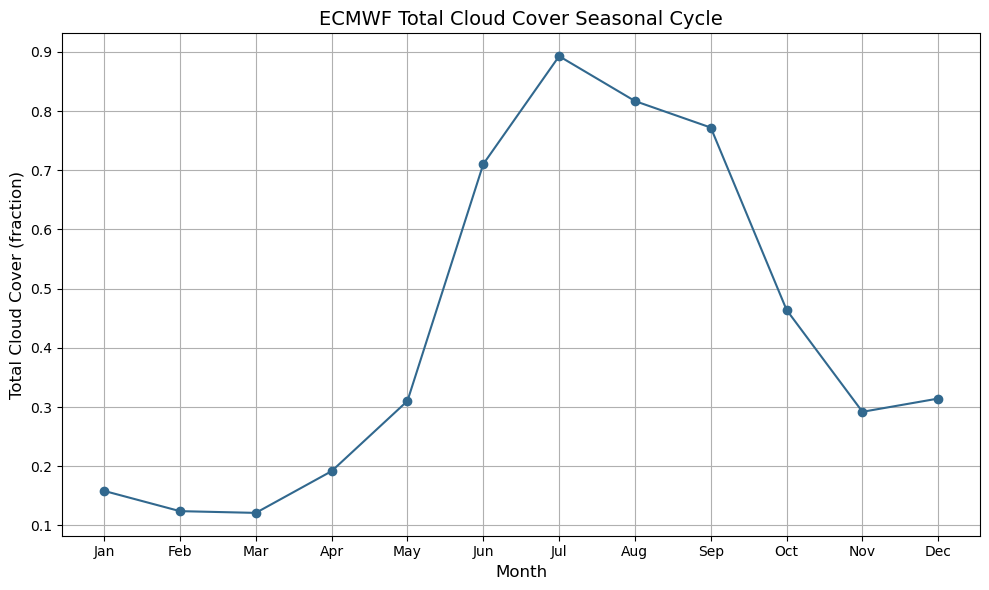

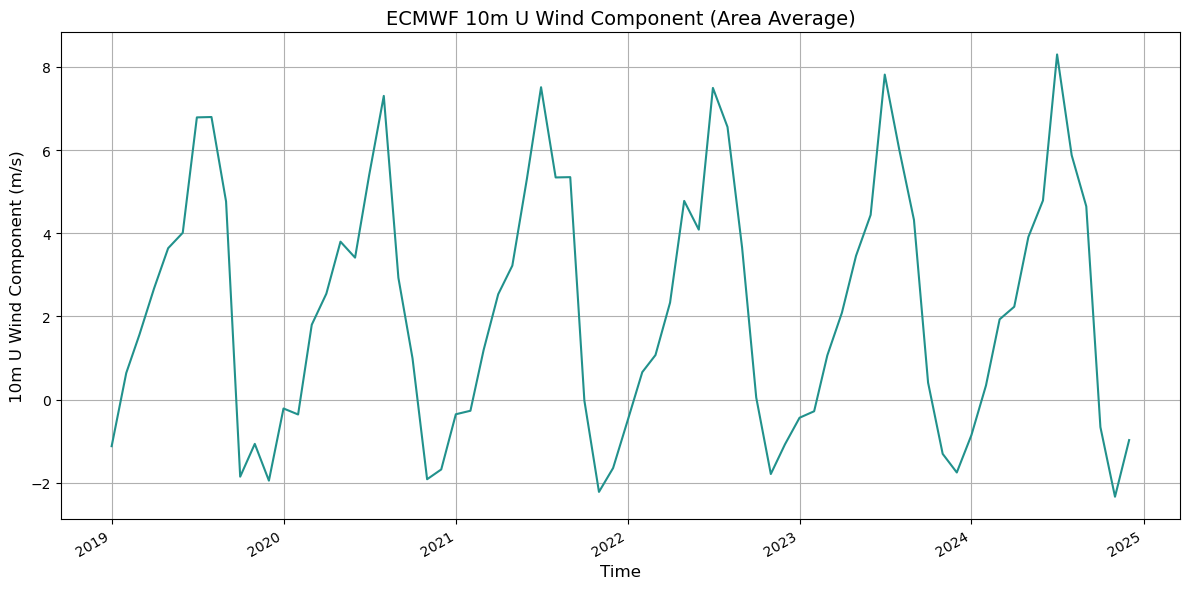

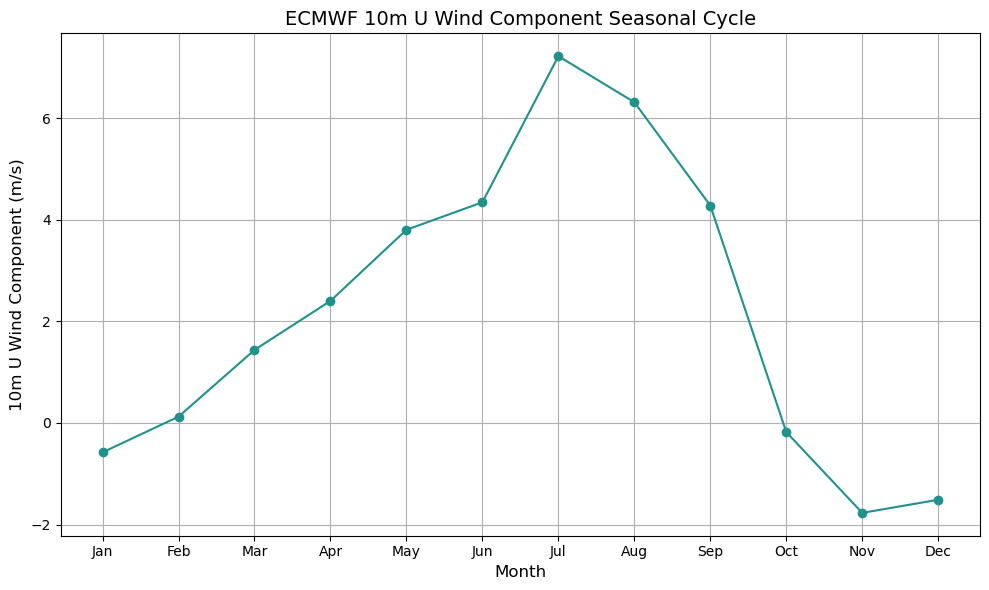

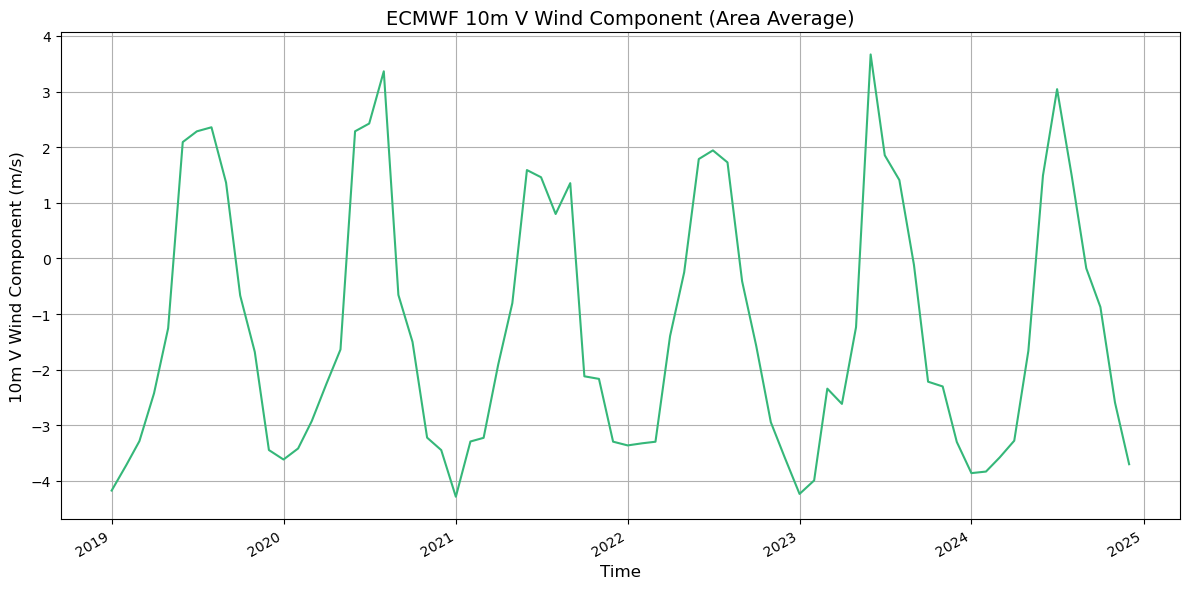

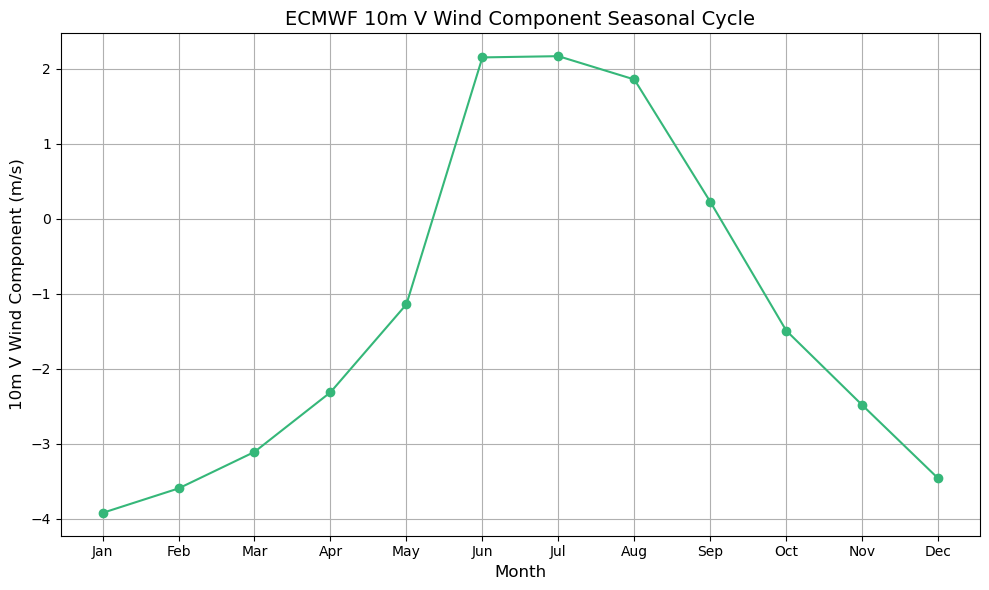

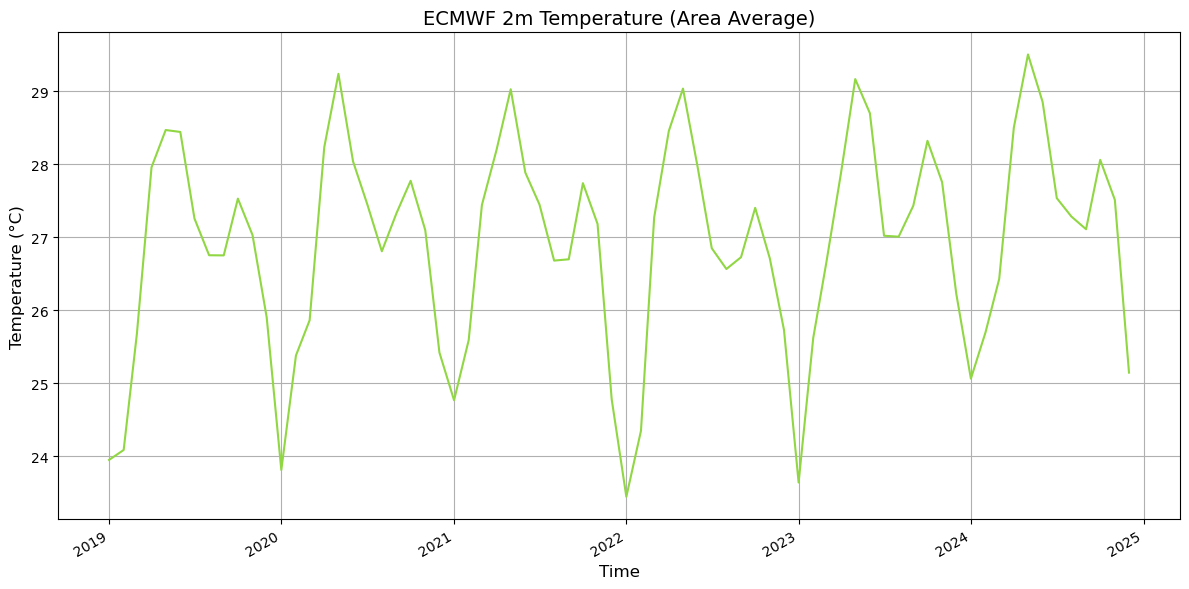

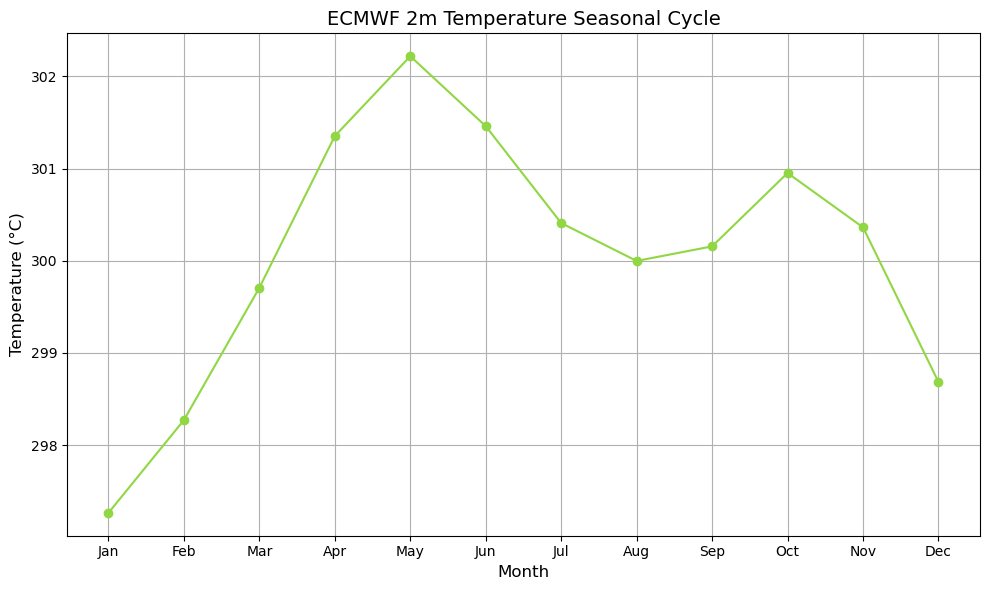

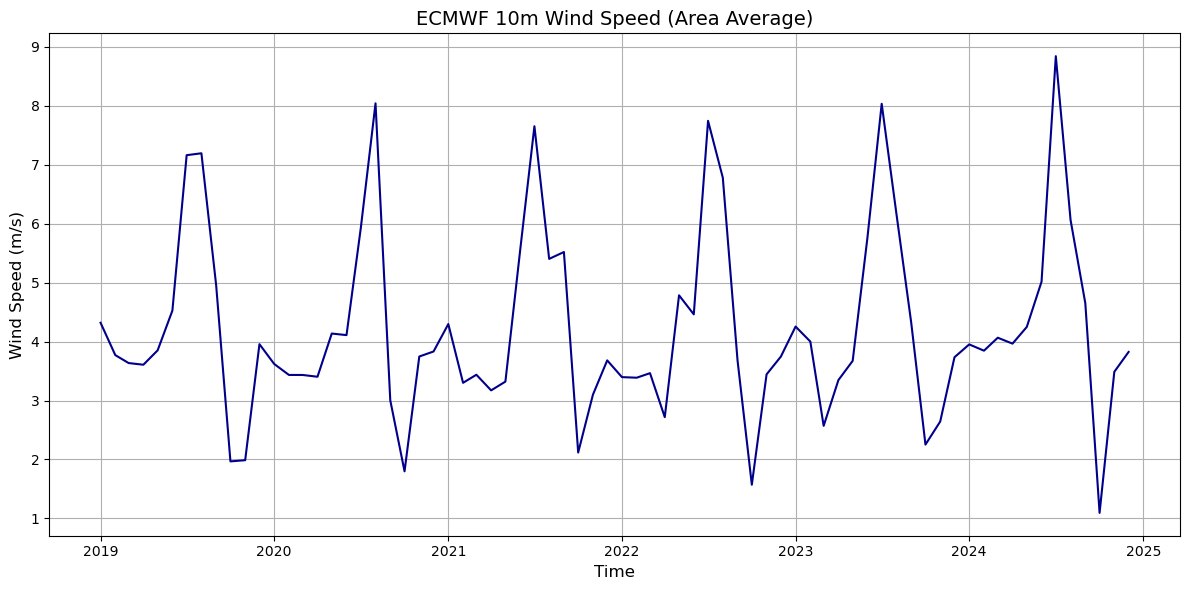

ECMWF variable plots created successfully!


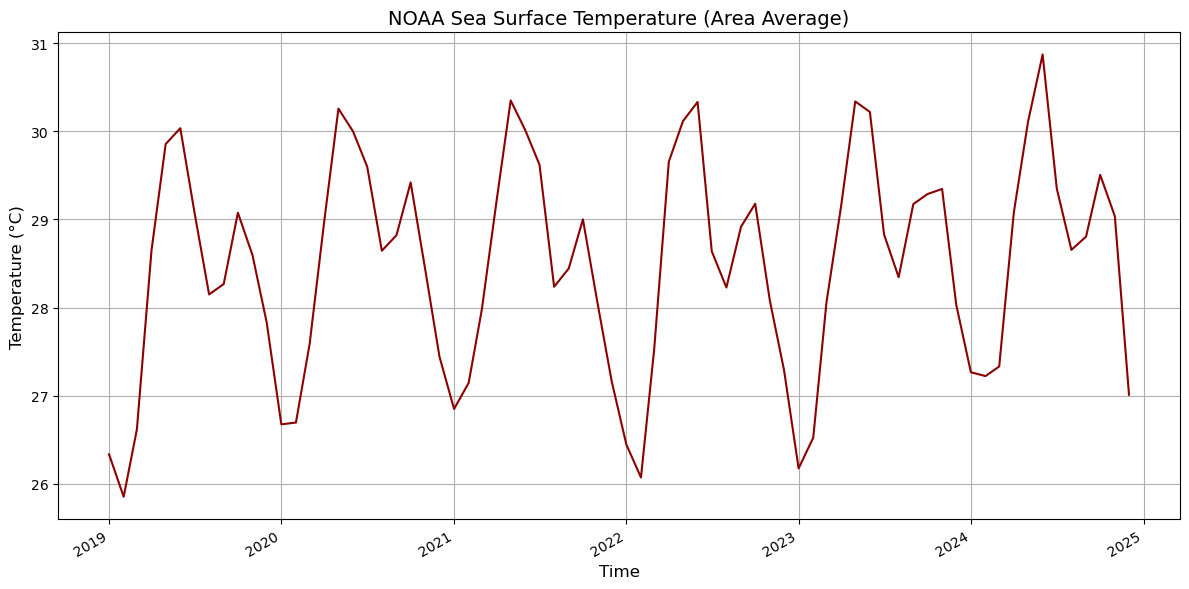

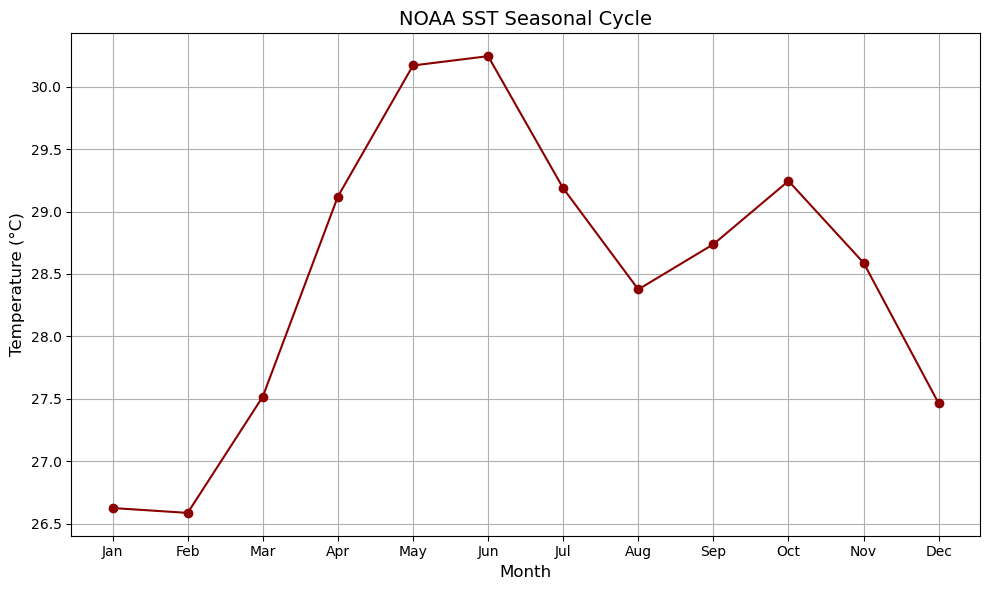

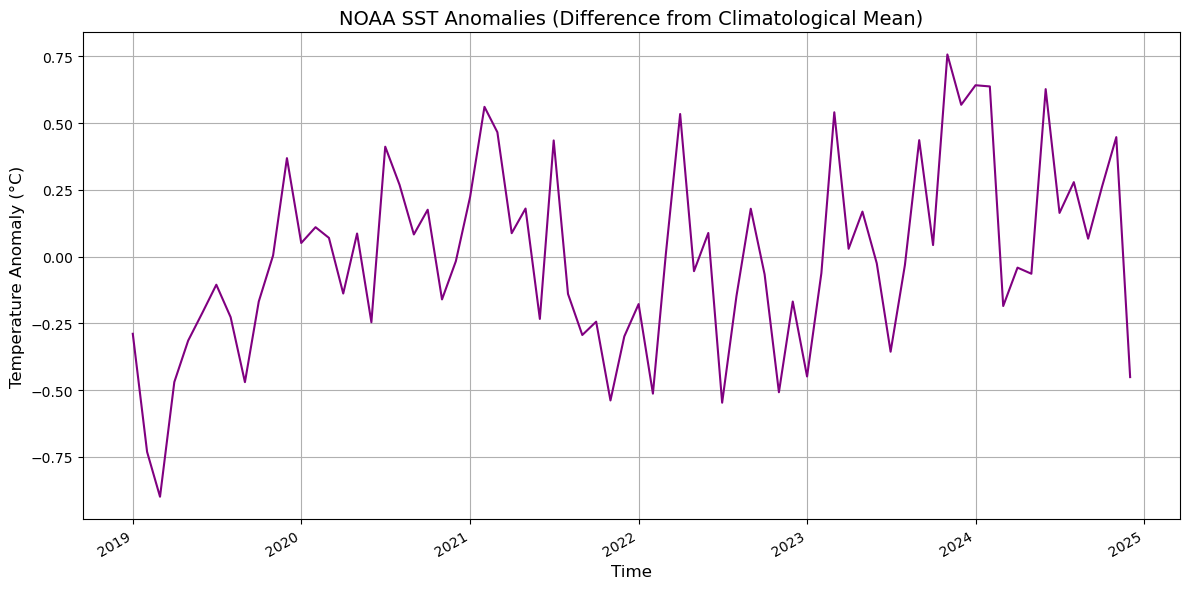

NOAA SST plots created successfully!


In [3]:
# Setting up global plotting parameters
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.grid'] = True
#plt.style.use('seaborn-v0_8-whitegrid')

#############################################
# 1. NOAA Precipitation Dataset Plotting Code
#############################################

def plot_noaa_precip(precip_file):
    """
    Create timeseries plots for NOAA Precipitation data
    """
    # Load the dataset
    ds = xr.open_dataset(precip_file)
   
    # Create a figure with 2 subplots: 1 for spatial average, 1 for specific points
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
   
    # Plot 1: Area-averaged precipitation timeseries
    precip_mean = ds.precip.mean(dim=['lat', 'lon'])
    precip_mean.plot(ax=ax1, color='blue', linewidth=1.5)
   
    ax1.set_title('NOAA Area-averaged Precipitation (2019-2025)', fontsize=14)
    ax1.set_xlabel('Time', fontsize=12)
    ax1.set_ylabel('Precipitation (mm/day)', fontsize=12)
    ax1.xaxis.set_major_locator(mdates.YearLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
   
    # Plot 2: Precipitation at specific points
    for i, lat in enumerate(ds.lat.values):
        for j, lon in enumerate(ds.lon.values):
            if i == 0 and j == 0:  # Only plot a selection of grid points
                label = f"lat={lat:.2f}, lon={lon:.2f}"
                ds.precip.sel(lat=lat, lon=lon).plot(ax=ax2, label=label)
   
    ax2.set_title('NOAA Precipitation at Selected Grid Points', fontsize=14)
    ax2.set_xlabel('Time', fontsize=12)
    ax2.set_ylabel('Precipitation (mm/day)', fontsize=12)
    ax2.legend(loc='upper right', fontsize=10)
    ax2.xaxis.set_major_locator(mdates.YearLocator())
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
   
    plt.tight_layout()
    #plt.savefig('noaa_precip_timeseries.png', dpi=300)
    plt.show()
    plt.close()
   
    # Create additional plot showing seasonal cycle
    precip_seasonal = ds.precip.groupby('time.month').mean()
   
    plt.figure(figsize=(10, 6))
    precip_seasonal.mean(dim=['lat', 'lon']).plot(marker='o')
    plt.title('NOAA Precipitation Seasonal Cycle', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Precipitation (mm/day)', fontsize=12)
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    #plt.savefig('noaa_precip_seasonal.png', dpi=300)
    plt.close()
   
    print("NOAA Precipitation plots created successfully!")


#############################################
# 2. ECMWF Dataset Plotting Code
#############################################

def plot_ecmwf_data(ecmwf_file):
    """
    Create timeseries plots for ECMWF variables:
    - msl: Mean sea level pressure
    - tcc: Total cloud cover
    - u10: 10m U wind component
    - v10: 10m V wind component
    - t2m: 2m temperature
    """
    # Load the dataset
    ds = xr.open_dataset(ecmwf_file)
   
    # List of variables to plot
    variables = ['msl', 'tcc', 'u10', 'v10', 't2m']
    titles = {
        'msl': 'Mean Sea Level Pressure',
        'tcc': 'Total Cloud Cover',
        'u10': '10m U Wind Component',
        'v10': '10m V Wind Component',
        't2m': '2m Temperature'
    }
    units = {
        'msl': 'hPa',
        'tcc': 'fraction',
        'u10': 'm/s',
        'v10': 'm/s',
        't2m': 'K'
    }
   
    # Create individual plots for each variable
    for var in variables:
        if var in ds:
            # Create figure for area average timeseries
            plt.figure(figsize=(12, 6))
           
            # Convert msl from Pa to hPa if needed
            if var == 'msl' and ds[var].max() > 10000:  # Likely in Pa
                area_mean = ds[var].mean(dim=['latitude', 'longitude']) / 100  # Convert to hPa
            else:
                area_mean = ds[var].mean(dim=['latitude', 'longitude'])
           
            # For temperature, convert to Celsius if it appears to be in Kelvin
            if var == 't2m' and area_mean.mean() > 100:  # Likely in Kelvin
                area_mean = area_mean - 273.15  # Convert to Celsius
                units[var] = '°C'  # Update unit
           
            area_mean.plot(linewidth=1.5, color=sns.color_palette("viridis", 5)[variables.index(var)])
           
            plt.title(f'ECMWF {titles[var]} (Area Average)', fontsize=14)
            plt.xlabel('Time', fontsize=12)
           
            # Adjust y-axis label based on variable
            if var == 't2m' and units[var] == '°C':
                plt.ylabel(f'Temperature ({units[var]})', fontsize=12)
            else:
                plt.ylabel(f'{titles[var]} ({units[var]})', fontsize=12)
           
            plt.grid(True)
            plt.tight_layout()
            plt.show()
            #plt.savefig(f'ecmwf_{var}_timeseries.png', dpi=300)
            plt.close()
           
            # Create seasonal cycle plot
            monthly_mean = ds[var].groupby('valid_time.month').mean()
           
            plt.figure(figsize=(10, 6))
            monthly_mean.mean(dim=['latitude', 'longitude']).plot(marker='o',
                color=sns.color_palette("viridis", 5)[variables.index(var)])
           
            plt.title(f'ECMWF {titles[var]} Seasonal Cycle', fontsize=14)
            plt.xlabel('Month', fontsize=12)
           
            if var == 't2m' and units[var] == '°C':
                plt.ylabel(f'Temperature ({units[var]})', fontsize=12)
            else:
                plt.ylabel(f'{titles[var]} ({units[var]})', fontsize=12)
           
            plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
            plt.grid(True)
            plt.tight_layout()
            plt.show()
            #plt.savefig(f'ecmwf_{var}_seasonal.png', dpi=300)
            plt.close()
           
    # Create wind vector evolution (combine u10 and v10)
    if 'u10' in ds and 'v10' in ds:
        # Calculate area-averaged wind speed and direction
        u_mean = ds['u10'].mean(dim=['latitude', 'longitude'])
        v_mean = ds['v10'].mean(dim=['latitude', 'longitude'])
        wind_speed = np.sqrt(u_mean**2 + v_mean**2)
       
        fig, ax1 = plt.subplots(figsize=(12, 6))
       
        # Plot wind speed
        ax1.plot(ds.valid_time, wind_speed, color='darkblue', linewidth=1.5)
        ax1.set_xlabel('Time', fontsize=12)
        ax1.set_ylabel('Wind Speed (m/s)', fontsize=12)
        ax1.set_title('ECMWF 10m Wind Speed (Area Average)', fontsize=14)
       
        plt.tight_layout()
        plt.show()
        #plt.savefig('ecmwf_wind_speed_timeseries.png', dpi=300)
        plt.close()
   
    print("ECMWF variable plots created successfully!")


#############################################
# 3. NOAA SST Dataset Plotting Code
#############################################

def plot_noaa_sst(sst_file):
    """
    Create timeseries plots for NOAA Sea Surface Temperature data
    """
    # Load the dataset
    ds = xr.open_dataset(sst_file)
   
    # Create area-averaged SST timeseries
    plt.figure(figsize=(12, 6))
    sst_mean = ds.sst.mean(dim=['lat', 'lon'])
   
    # Convert to Celsius if it appears to be in Kelvin
    if sst_mean.mean() > 100:  # Likely in Kelvin
        sst_mean = sst_mean - 273.15
        units = '°C'
    else:
        units = '°C'  # Assuming it's already in Celsius
   
    sst_mean.plot(linewidth=1.5, color='darkred')
   
    plt.title('NOAA Sea Surface Temperature (Area Average)', fontsize=14)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel(f'Temperature ({units})', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    #plt.savefig('noaa_sst_timeseries.png', dpi=300)
    plt.close()
   
    # Create seasonal cycle plot
    sst_seasonal = ds.sst.groupby('time.month').mean()
   
    plt.figure(figsize=(10, 6))
    sst_seasonal.mean(dim=['lat', 'lon']).plot(marker='o', color='darkred')
   
    plt.title('NOAA SST Seasonal Cycle', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel(f'Temperature ({units})', fontsize=12)
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    #plt.savefig('noaa_sst_seasonal.png', dpi=300)
    plt.close()
   
    # Create anomaly plot (difference from climatological mean)
    climatology = ds.sst.groupby('time.month').mean()
    anomalies = ds.sst.groupby('time.month') - climatology
    anom_mean = anomalies.mean(dim=['lat', 'lon'])
   
    plt.figure(figsize=(12, 6))
    anom_mean.plot(linewidth=1.5, color='purple')
   
    plt.title('NOAA SST Anomalies (Difference from Climatological Mean)', fontsize=14)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel(f'Temperature Anomaly ({units})', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    #plt.savefig('noaa_sst_anomalies.png', dpi=300)
    plt.close()
   
    print("NOAA SST plots created successfully!")


if __name__ == "__main__":
    # Define your file paths here
    noaa_precip_file = r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\precip_konkan.nc"
    ecmwf_file =  r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\ECMWF - skt , v10 ,u10 , msl ,tcc , 2m temp.nc"
    noaa_sst_file =  r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\noaa_sst_masked.nc"

   
    # Generate individual dataset plots
    plot_noaa_precip(noaa_precip_file)
    plot_ecmwf_data(ecmwf_file)
    plot_noaa_sst(noaa_sst_file)

# HEATMAPS

In [5]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [5]:
# Set plotting style
plt.style.use('seaborn-whitegrid')

# 1. NOAA Precipitation Dataset - Average over time
def plot_noaa_precip_average(ds_precip):
    """
    Plot average NOAA precipitation heatmap over entire time range
    """
    # Calculate time average
    precip_avg = ds_precip.precip.mean(dim='time')
   
    # Create plot
    fig, ax = plt.subplots(figsize=(10, 8))
   
    # Custom blue colormap for precipitation
    cmap_precip = LinearSegmentedColormap.from_list('precip_blues',
                                                    ['#FFFFFF', '#D1EEFC', '#75C6EF', '#1E90FF', '#0066CC', '#003366'])
   
    # Create heatmap
    precip_plot = ax.pcolormesh(ds_precip.lon, ds_precip.lat, precip_avg,
                               cmap=cmap_precip, shading='auto')
   
    # Add colorbar and labels
    cbar = plt.colorbar(precip_plot, ax=ax, pad=0.05)
    cbar.set_label('Average Precipitation (mm)', fontsize=12)
   
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
   
    # Add time range info to title
    start_date = np.datetime_as_string(ds_precip.time[0].values, unit="D")
    end_date = np.datetime_as_string(ds_precip.time[-1].values, unit="D")
    ax.set_title(f'NOAA Average Precipitation\n{start_date} to {end_date}', fontsize=14)
   
    plt.tight_layout()
    plt.show()
    return fig

# 2. ECMWF Dataset - Each variable separately (averaged over time)
def plot_ecmwf_variable_average(ds_ecmwf, var_name, cmap=None):
    """
    Plot average ECMWF variables as heatmaps over entire time range
    var_name options: 'msl', 'tcc', 'u10', 'v10', 't2m'
    """
    # Set default colormap if not provided
    if cmap is None:
        cmaps = {
            'msl': 'viridis',
            'tcc': 'Blues',
            'u10': 'RdBu_r',
            'v10': 'RdBu_r',
            't2m': 'RdYlBu_r'
        }
        cmap = cmaps.get(var_name, 'viridis')
   
    # Calculate time average
    var_avg = ds_ecmwf[var_name].mean(dim='valid_time')
   
    # Get variable-specific title and colorbar label
    var_labels = {
        'msl': ('Mean Sea Level Pressure', 'Pressure (hPa)'),
        'tcc': ('Total Cloud Cover', 'Cloud Cover (%)'),
        'u10': ('U-Component of Wind at 10m', 'Wind Speed (m/s)'),
        'v10': ('V-Component of Wind at 10m', 'Wind Speed (m/s)'),
        't2m': ('Temperature at 2m', 'Temperature (K)')
    }
    title, cbar_label = var_labels.get(var_name, (var_name, var_name))
   
    # Create plot
    fig, ax = plt.subplots(figsize=(10, 8))
   
    # Create heatmap
    var_plot = ax.pcolormesh(ds_ecmwf.longitude, ds_ecmwf.latitude, var_avg,
                            cmap=cmap, shading='auto')
   
    # Add colorbar and labels
    cbar = plt.colorbar(var_plot, ax=ax, pad=0.05)
    cbar.set_label(f'Average {cbar_label}', fontsize=12)
   
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
   
    # Add time range info to title
    start_date = np.datetime_as_string(ds_ecmwf.valid_time[0].values, unit="D")
    end_date = np.datetime_as_string(ds_ecmwf.valid_time[-1].values, unit="D")
    ax.set_title(f'ECMWF Average {title}\n{start_date} to {end_date}', fontsize=14)
   
    plt.tight_layout()
    plt.show()
    return fig

# 3. ECMWF Wind Vector Plot (Average U10 and V10)
def plot_ecmwf_wind_vectors_average(ds_ecmwf):
    """
    Plot average wind vectors using u10 and v10 components over entire time range
    """
    # Calculate time average
    u10_avg = ds_ecmwf.u10.mean(dim='valid_time')
    v10_avg = ds_ecmwf.v10.mean(dim='valid_time')
    wind_speed_avg = np.sqrt(u10_avg**2 + v10_avg**2)
   
    # Create plot with wind vectors and wind speed as background
    fig, ax = plt.subplots(figsize=(12, 10))
   
    # Plot wind speed as background
    speed_plot = ax.pcolormesh(ds_ecmwf.longitude, ds_ecmwf.latitude, wind_speed_avg,
                              cmap='viridis', shading='auto')
   
    # Add wind vectors (subsample for clarity)
    quiver_stride = 1  # adjust for desired density (smaller stride for higher density)
    lon_mesh, lat_mesh = np.meshgrid(ds_ecmwf.longitude[::quiver_stride], ds_ecmwf.latitude[::quiver_stride])
    ax.quiver(lon_mesh, lat_mesh,
             u10_avg[::quiver_stride, ::quiver_stride],
             v10_avg[::quiver_stride, ::quiver_stride],
             scale=30, color='white', alpha=0.8)
   
    # Add colorbar and labels
    cbar = plt.colorbar(speed_plot, ax=ax, pad=0.05)
    cbar.set_label('Average Wind Speed (m/s)', fontsize=12)
   
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
   
    # Add time range info to title
    start_date = np.datetime_as_string(ds_ecmwf.valid_time[0].values, unit="D")
    end_date = np.datetime_as_string(ds_ecmwf.valid_time[-1].values, unit="D")
    ax.set_title(f'ECMWF Average Wind Vectors\n{start_date} to {end_date}', fontsize=14)
   
    plt.tight_layout()
    plt.show()
    return fig

# 4. NOAA SST Dataset - Average over time
def plot_noaa_sst_average(ds_sst):
    """
    Plot average NOAA Sea Surface Temperature heatmap over entire time range
    """
    # Calculate time average
    sst_avg = ds_sst.sst.mean(dim='time')
   
    # Create plot
    fig, ax = plt.subplots(figsize=(10, 8))
   
    # Create heatmap with RdYlBu_r colormap for temperature
    sst_plot = ax.pcolormesh(ds_sst.lon, ds_sst.lat, sst_avg,
                           cmap='RdYlBu_r', shading='auto')
   
    # Add colorbar and labels
    cbar = plt.colorbar(sst_plot, ax=ax, pad=0.05)
    cbar.set_label('Average Sea Surface Temperature (°C)', fontsize=12)
   
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
   
    # Add time range info to title
    start_date = np.datetime_as_string(ds_sst.time[0].values, unit="D")
    end_date = np.datetime_as_string(ds_sst.time[-1].values, unit="D")
    ax.set_title(f'NOAA Average Sea Surface Temperature\n{start_date} to {end_date}', fontsize=14)
   
    plt.tight_layout()
    plt.show()
    return fig

# 5. Multi-Variable ECMWF Panel (all in one figure) - Averaged
def plot_ecmwf_panel_average(ds_ecmwf):
    """
    Plot all averaged ECMWF variables in a single panel
    """
    # Define variable names and their associated cmaps
    vars_and_cmaps = {
        'msl': 'viridis',
        'tcc': 'Blues',
        't2m': 'RdYlBu_r',
    }
   
    # Create figure with subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 14))
    axes = axes.flatten()
   
    # Plot each variable
    for i, (var_name, cmap) in enumerate(vars_and_cmaps.items()):
        if i < len(axes) - 1:  # One spot reserved for wind vectors
            var_avg = ds_ecmwf[var_name].mean(dim='valid_time')
            var_plot = axes[i].pcolormesh(ds_ecmwf.longitude, ds_ecmwf.latitude, var_avg,
                                       cmap=cmap, shading='auto')
            cbar = plt.colorbar(var_plot, ax=axes[i], pad=0.05)
           
            # Get variable labels
            var_labels = {
                'msl': ('Mean Sea Level Pressure', 'Pressure (hPa)'),
                'tcc': ('Total Cloud Cover', 'Cloud Cover (%)'),
                't2m': ('Temperature at 2m', 'Temperature (K)')
            }
            title, cbar_label = var_labels.get(var_name, (var_name, var_name))
           
            cbar.set_label(f'Average {cbar_label}', fontsize=10)
            axes[i].set_title(f'Average {title}', fontsize=12)
            axes[i].set_xlabel('Longitude', fontsize=10)
            axes[i].set_ylabel('Latitude', fontsize=10)
   
    # Plot average wind vectors in the last panel
    u10_avg = ds_ecmwf.u10.mean(dim='valid_time')
    v10_avg = ds_ecmwf.v10.mean(dim='valid_time')
    wind_speed_avg = np.sqrt(u10_avg**2 + v10_avg**2)
   
    # Plot wind speed as background
    speed_plot = axes[-1].pcolormesh(ds_ecmwf.longitude, ds_ecmwf.latitude, wind_speed_avg,
                                  cmap='viridis', shading='auto')
   
    # Add wind vectors
    quiver_stride = 1  # Smaller stride for higher vector density
    lon_mesh, lat_mesh = np.meshgrid(ds_ecmwf.longitude[::quiver_stride], ds_ecmwf.latitude[::quiver_stride])
    axes[-1].quiver(lon_mesh, lat_mesh,
                 u10_avg[::quiver_stride, ::quiver_stride],
                 v10_avg[::quiver_stride, ::quiver_stride],
                 scale=30, color='white', alpha=0.8)
   
    cbar = plt.colorbar(speed_plot, ax=axes[-1], pad=0.05)
    cbar.set_label('Average Wind Speed (m/s)', fontsize=10)
    axes[-1].set_title('Average Wind Vectors (u10, v10)', fontsize=12)
    axes[-1].set_xlabel('Longitude', fontsize=10)
    axes[-1].set_ylabel('Latitude', fontsize=10)
   
    # Add time range to main title
    start_date = np.datetime_as_string(ds_ecmwf.valid_time[0].values, unit="D")
    end_date = np.datetime_as_string(ds_ecmwf.valid_time[-1].values, unit="D")
    plt.suptitle(f'ECMWF Average Variables\n{start_date} to {end_date}', fontsize=16)
   
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    return fig

# 6. Seasonal Averages (Optional)
def plot_seasonal_averages(ds, var_name, time_dim='time', lat_dim='lat', lon_dim='lon'):
    """
    Plot seasonal averages for a given variable
    """
    # Convert dataset time to datetime if not already
    if not np.issubdtype(ds[time_dim].dtype, np.datetime64):
        ds[time_dim] = ds[time_dim].astype('datetime64[ns]')
   
    # Create a copy of the dataset with a 'season' coordinate
    ds_with_season = ds.copy()
   
    # Add season information
    month_to_season = {1: 'Dec-Jan-Feb', 2: 'Dec-Jan-Feb,', 3: 'Mar-Apr-May', 4: 'Mar-Apr-May', 5: 'Mar-Apr-May',
                       6: 'Jun-Jul-Aug', 7: 'Jun-Jul-Aug', 8: 'Jun-Jul-Aug', 9: 'Sep-Oct-Nov', 10: 'Sep-Oct-Nov',
                       11: 'Sep-Oct-Nov', 12: 'Dec-Jan-Feb,'}
   
    # Extract month and map to season
    months = ds[time_dim].dt.month.values
    seasons = [month_to_season[m] for m in months]
    ds_with_season = ds_with_season.assign_coords(season=('time', seasons))
   
    # Calculate seasonal averages
    seasonal_avg = ds_with_season[var_name].groupby('season').mean(dim=time_dim)
   
    # Create figure with 4 subplots (one for each season)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 14))
    axes = axes.flatten()
   
    # Define color maps based on variable
    if 'precip' in var_name:
        cmap = 'Blues'
        label = 'Precipitation (mm)'
    elif 'sst' in var_name:
        cmap = 'RdYlBu_r'
        label = 'Temperature (°C)'
    elif 't2m' in var_name:
        cmap = 'RdYlBu_r'
        label = 'Temperature (K)'
    else:
        cmap = 'viridis'
        label = var_name
   
    # Plot each season
    for i, season in enumerate(['Dec-Jan-Feb', 'Mar-Apr-May', 'Jun-Jul-Aug', 'Sep-Oct-Nov']):
        if season in seasonal_avg.season.values:
            season_data = seasonal_avg.sel(season=season)
           
            # Get coordinate names for proper plotting
            lon_coords = ds[lon_dim]
            lat_coords = ds[lat_dim]
           
            # Create heatmap
            im = axes[i].pcolormesh(lon_coords, lat_coords, season_data,
                                  cmap=cmap, shading='auto')
           
            # Add colorbar
            cbar = plt.colorbar(im, ax=axes[i], pad=0.05)
            cbar.set_label(f'Average {label}', fontsize=10)
           
            axes[i].set_title(f'{season} Average {var_name.upper()}', fontsize=12)
            axes[i].set_xlabel('Longitude', fontsize=10)
            axes[i].set_ylabel('Latitude', fontsize=10)
   
    plt.suptitle(f'Seasonal Average {var_name.upper()}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    return fig

# Load your datasets
ds_precip = xr.open_dataset( r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\precip_konkan.nc")
ds_ecmwf = xr.open_dataset( r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\ECMWF - skt , v10 ,u10 , msl ,tcc , 2m temp.nc")
ds_sst = xr.open_dataset( r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\noaa_sst_masked.nc")

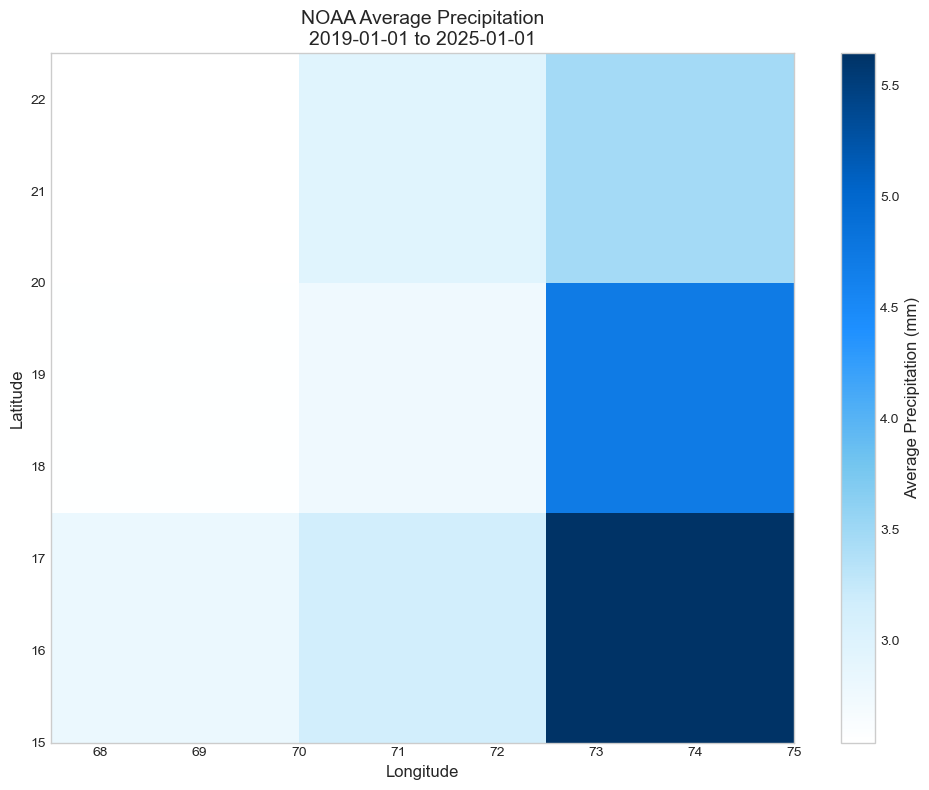

In [21]:
# 1. Plot average NOAA Precipitation
fig_precip_avg = plot_noaa_precip_average(ds_precip)
fig_precip_avg.savefig(r'C:\Users\Admin\RIYA PROJECT\visualizations\precip\noaa_precip_average_heatmap.png', dpi=300, bbox_inches='tight')

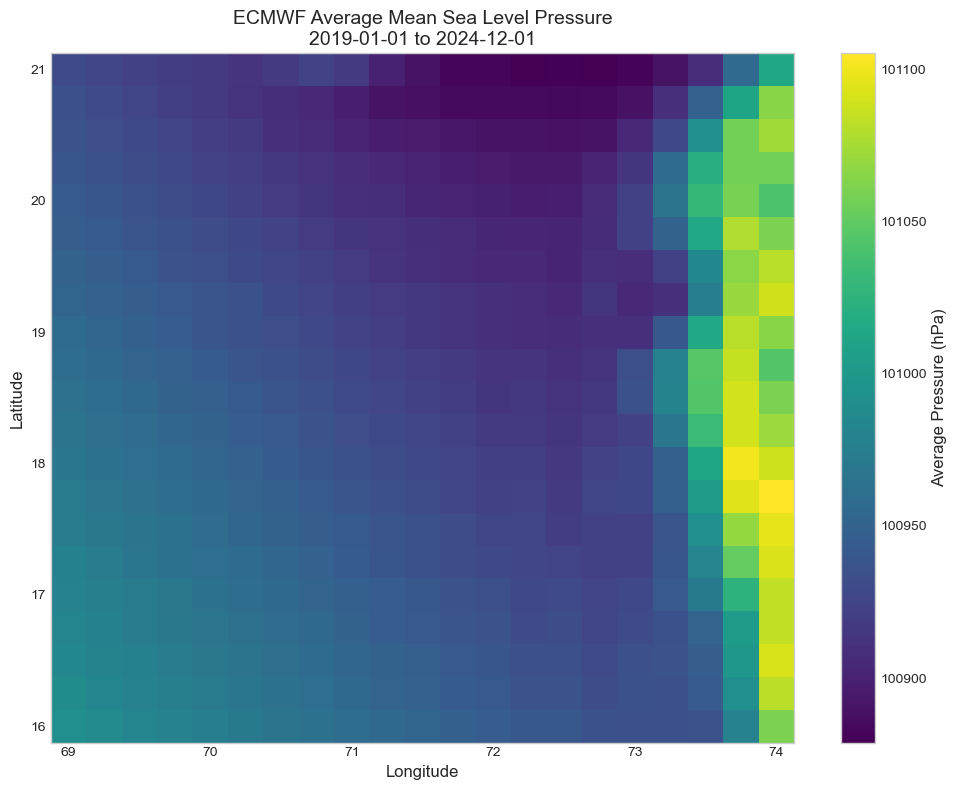

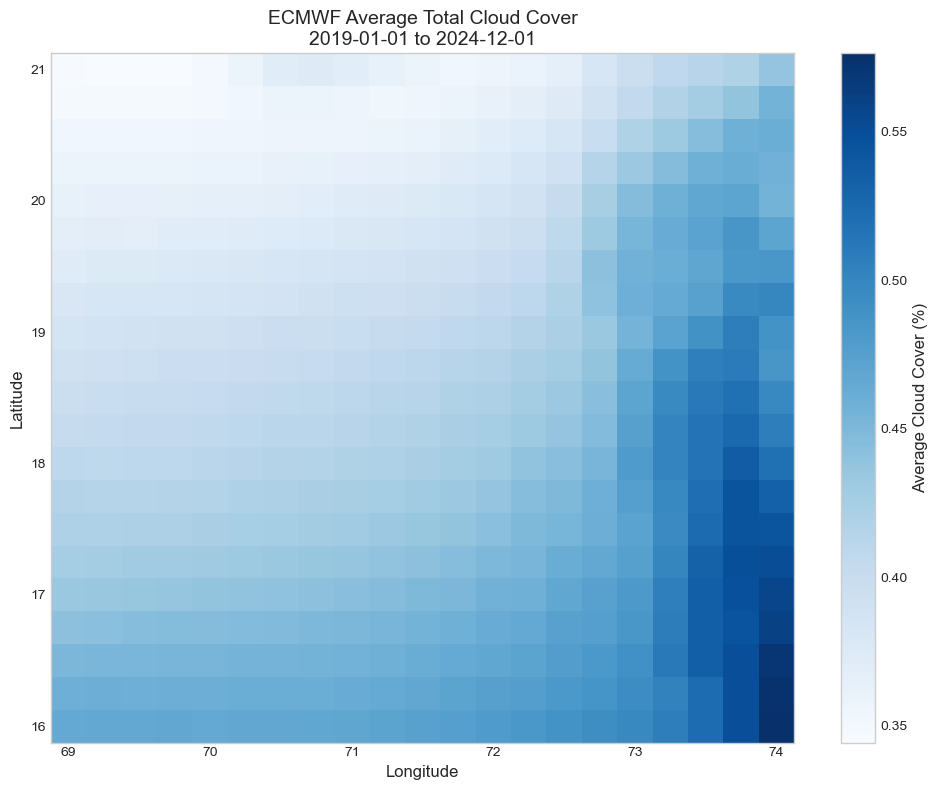

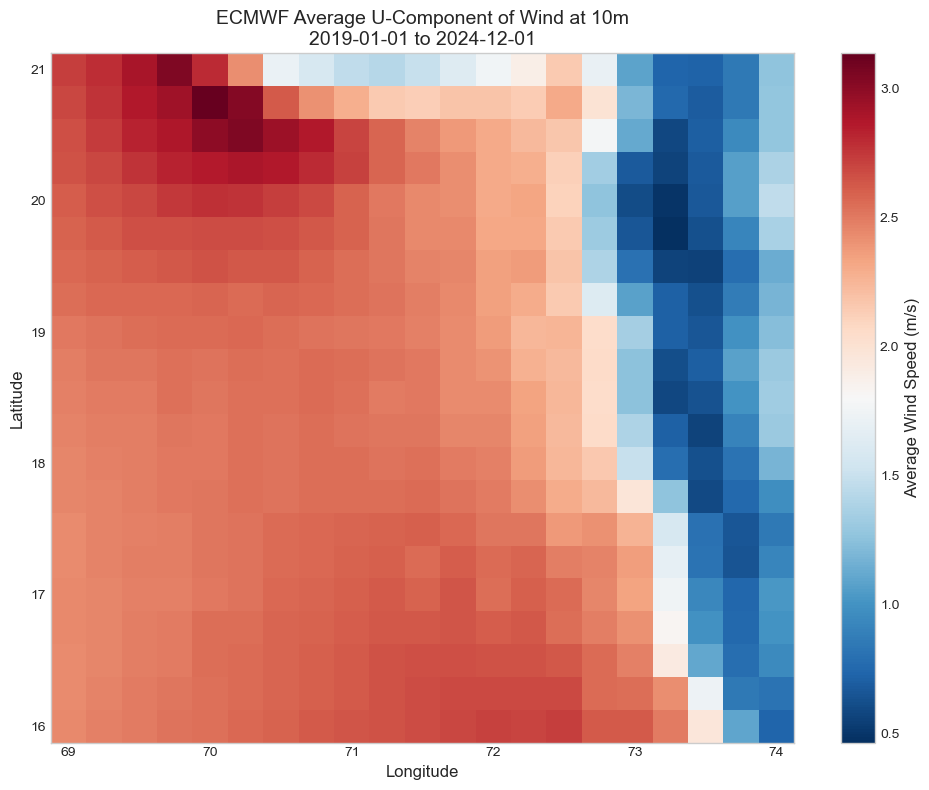

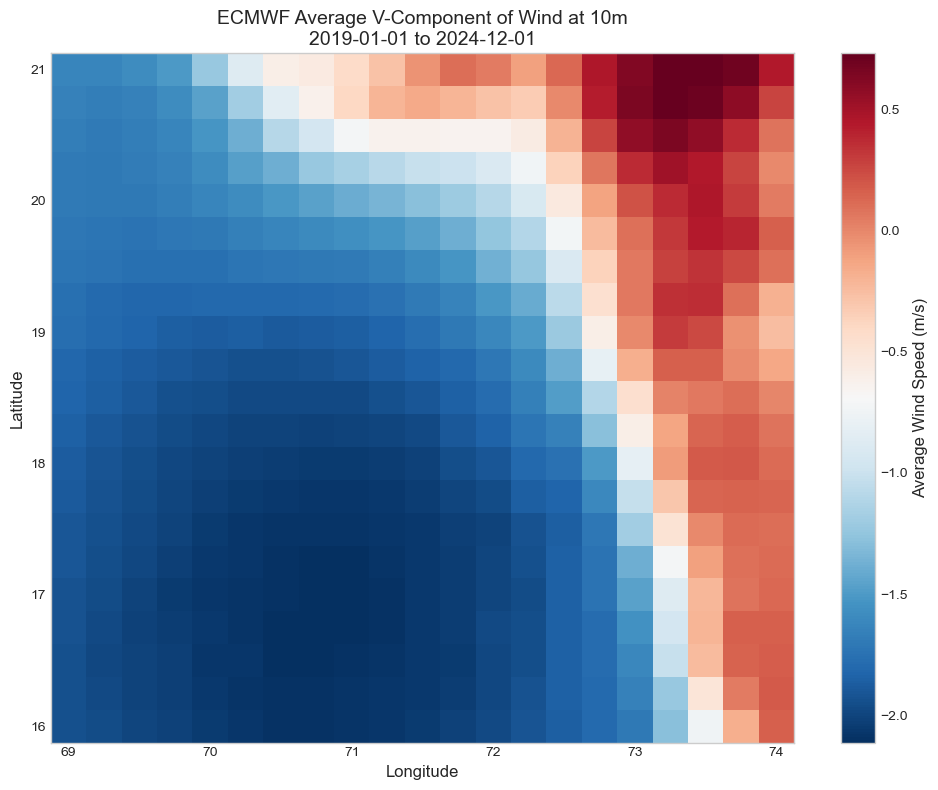

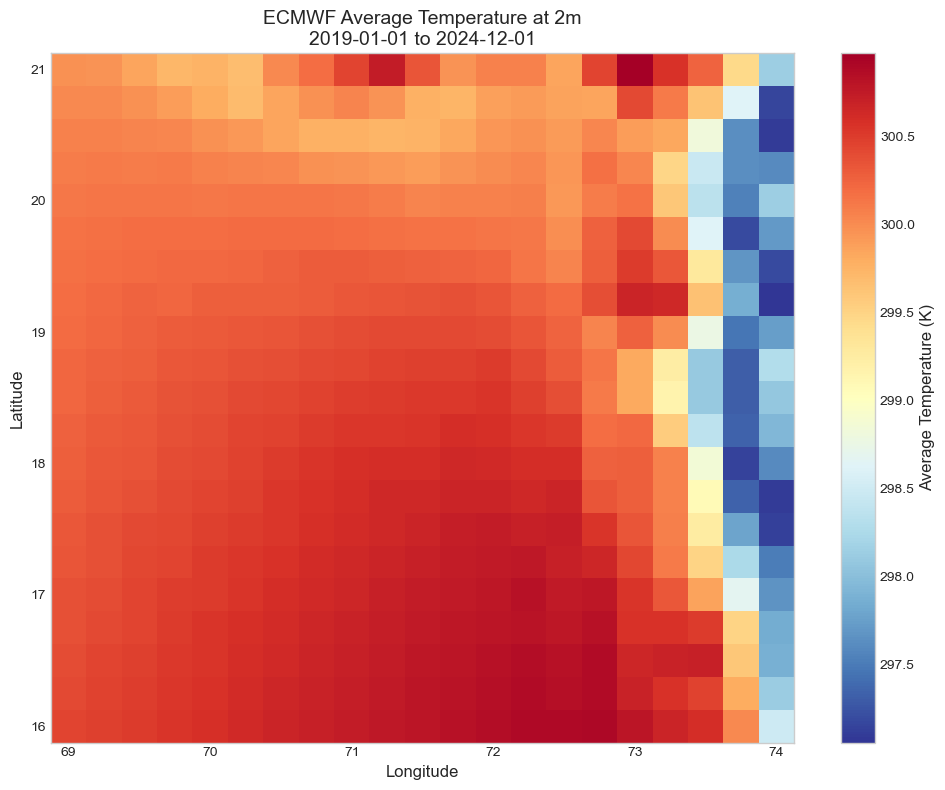

In [22]:
# 2. Plot average ECMWF variables
for var_name in ['msl', 'tcc', 'u10', 'v10', 't2m']:
    fig_var_avg = plot_ecmwf_variable_average(ds_ecmwf, var_name)
    fig_var_avg.savefig(f'ecmwf_{var_name}_average_heatmap.png', dpi=300, bbox_inches='tight')

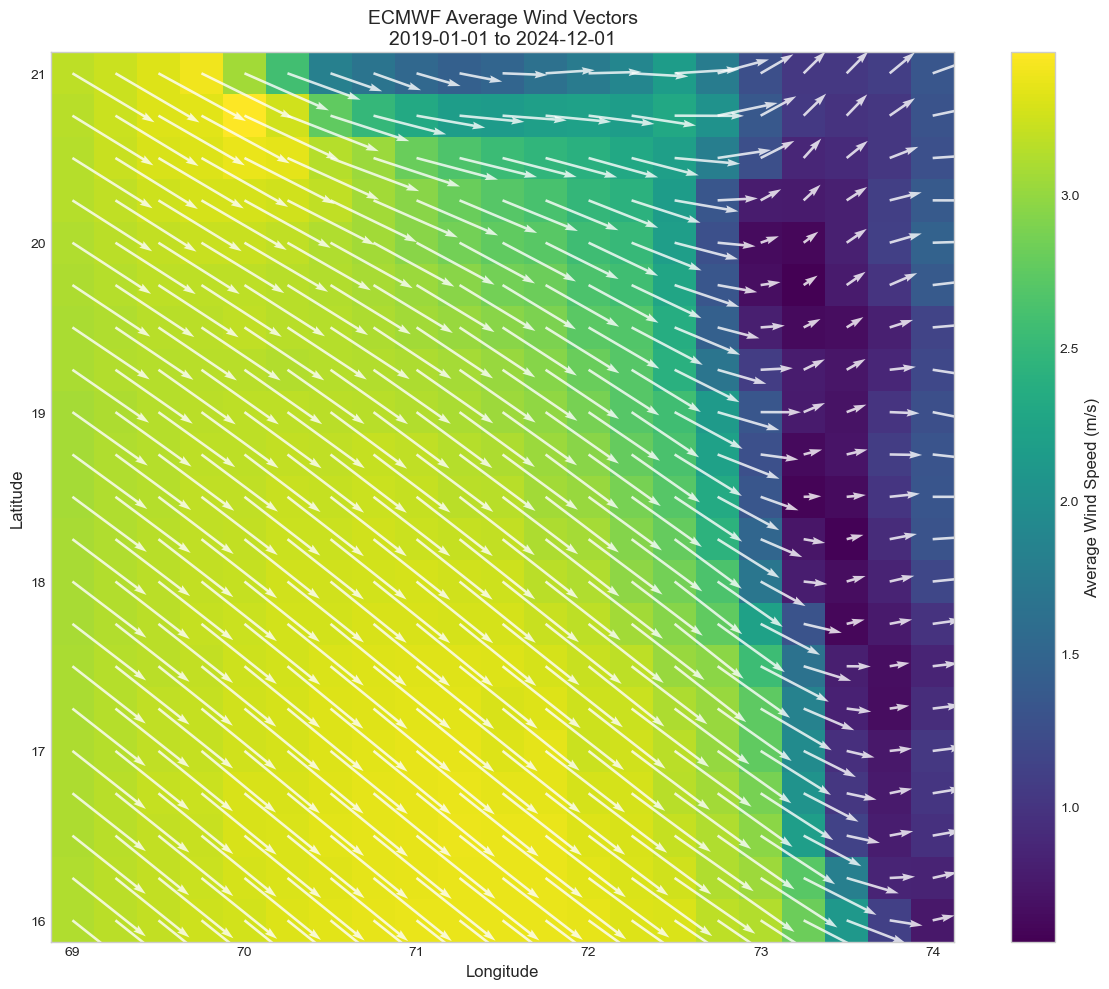

In [23]:
# 3. Plot average ECMWF wind vectors
fig_wind_avg = plot_ecmwf_wind_vectors_average(ds_ecmwf)
fig_wind_avg.savefig('ecmwf_wind_vectors_average.png', dpi=300, bbox_inches='tight')

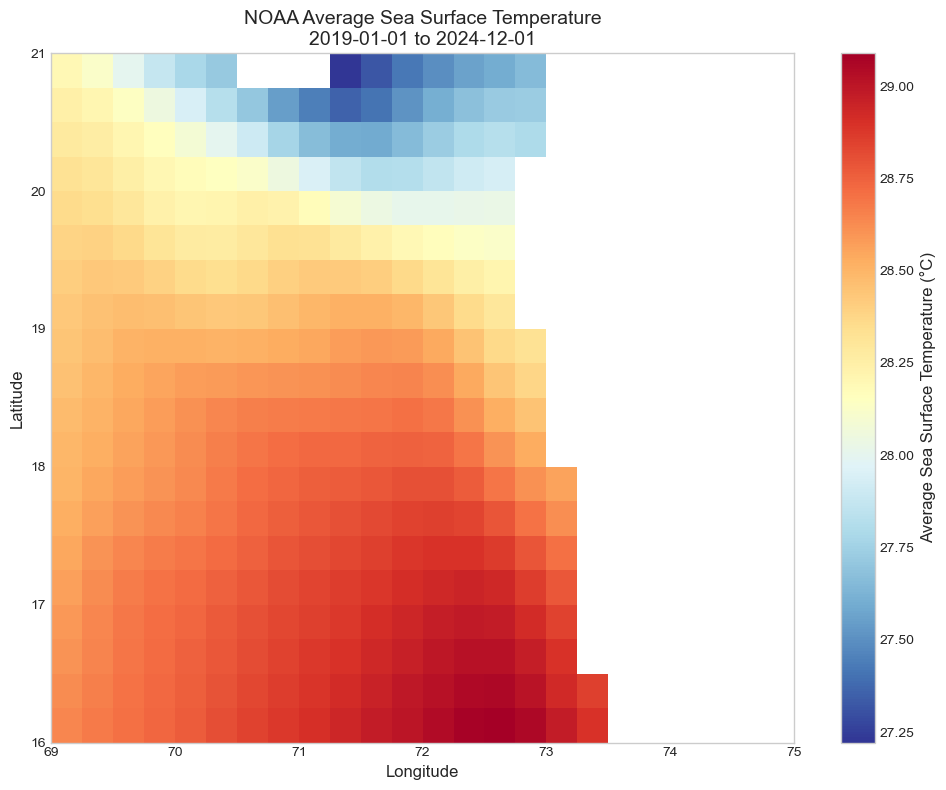

In [24]:
# 4. Plot average NOAA SST
fig_sst_avg = plot_noaa_sst_average(ds_sst)
fig_sst_avg.savefig(r'C:\Users\Admin\RIYA PROJECT\visualizations\sst noaa\noaa_sst_average_heatmap.png', dpi=300, bbox_inches='tight')

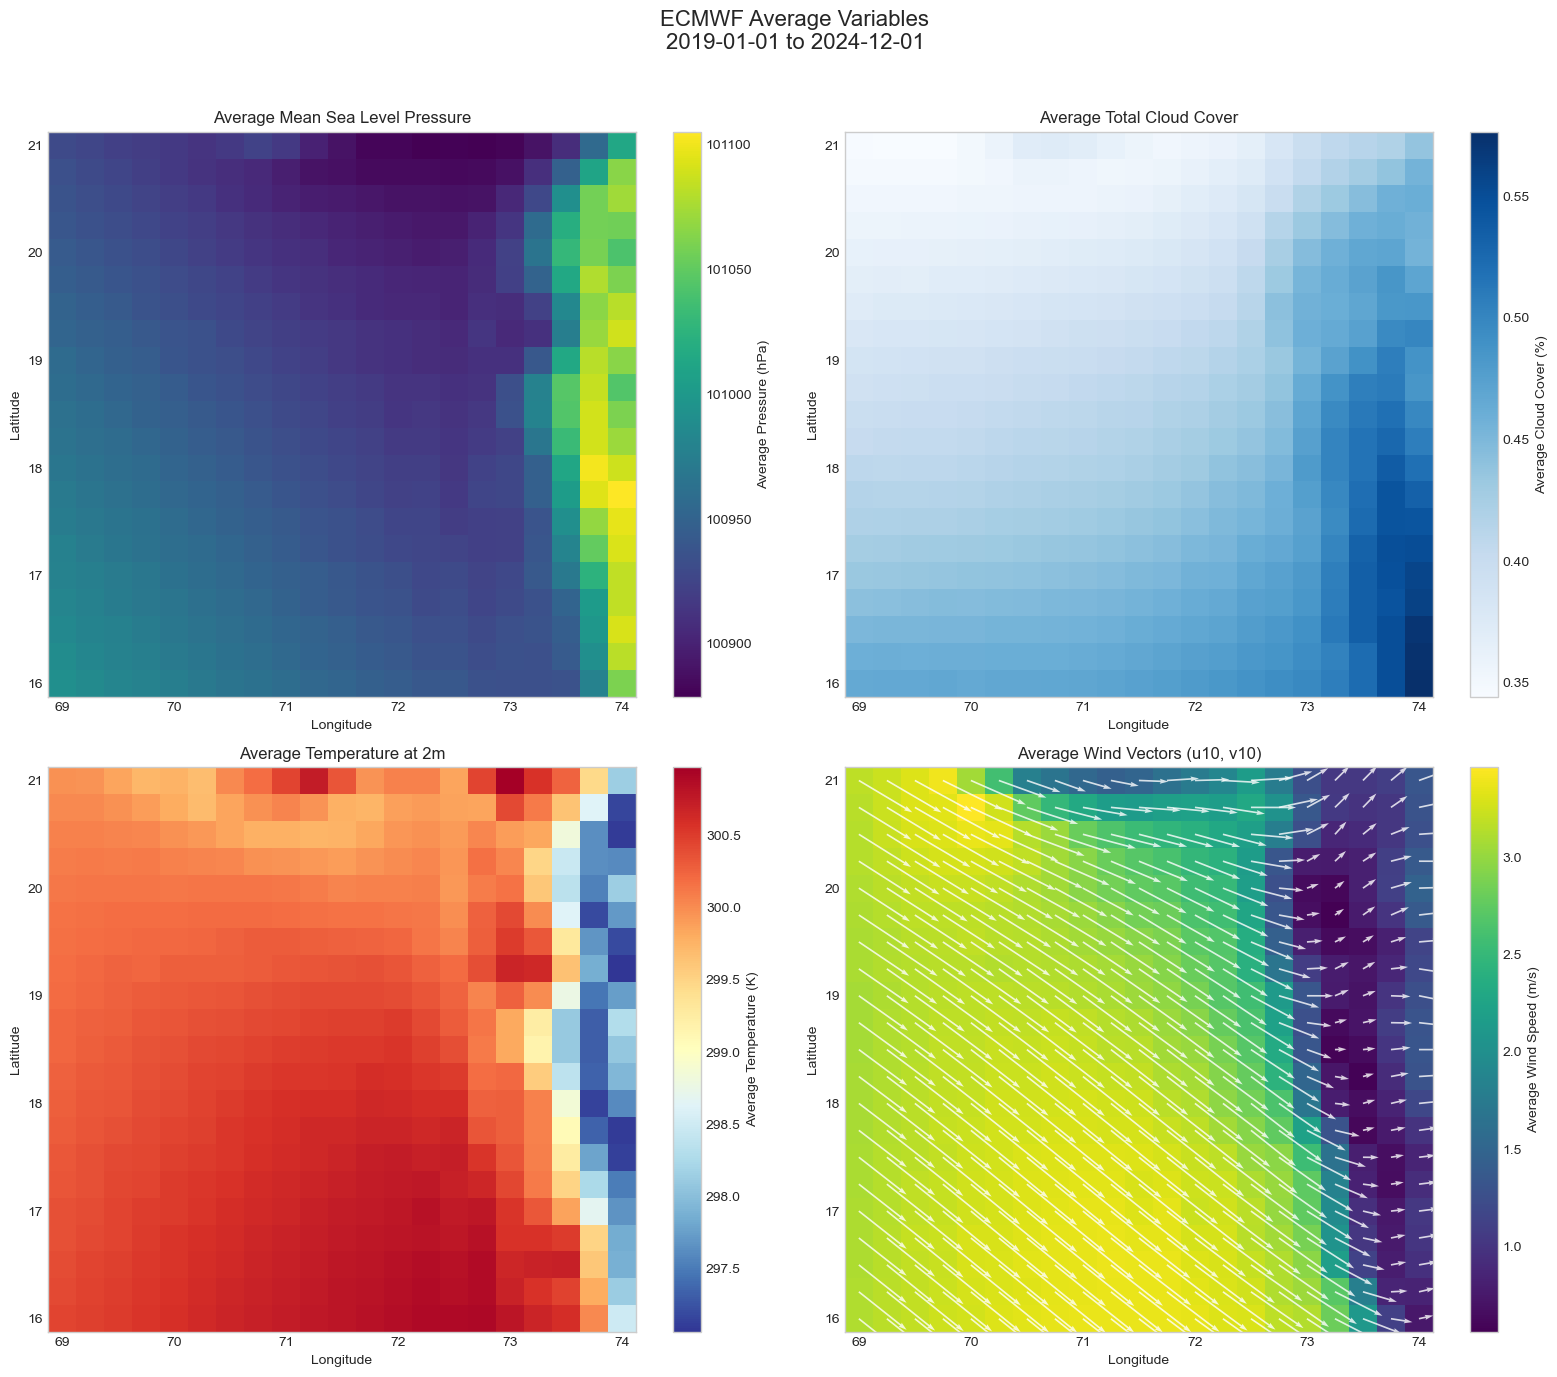

In [25]:
# 5. Plot panel of all average ECMWF variables
fig_panel_avg = plot_ecmwf_panel_average(ds_ecmwf)
fig_panel_avg.savefig(r'C:\Users\Admin\RIYA PROJECT\visualizations\ecmwf\ecmwf_all_variables_average_panel.png', dpi=300, bbox_inches='tight')

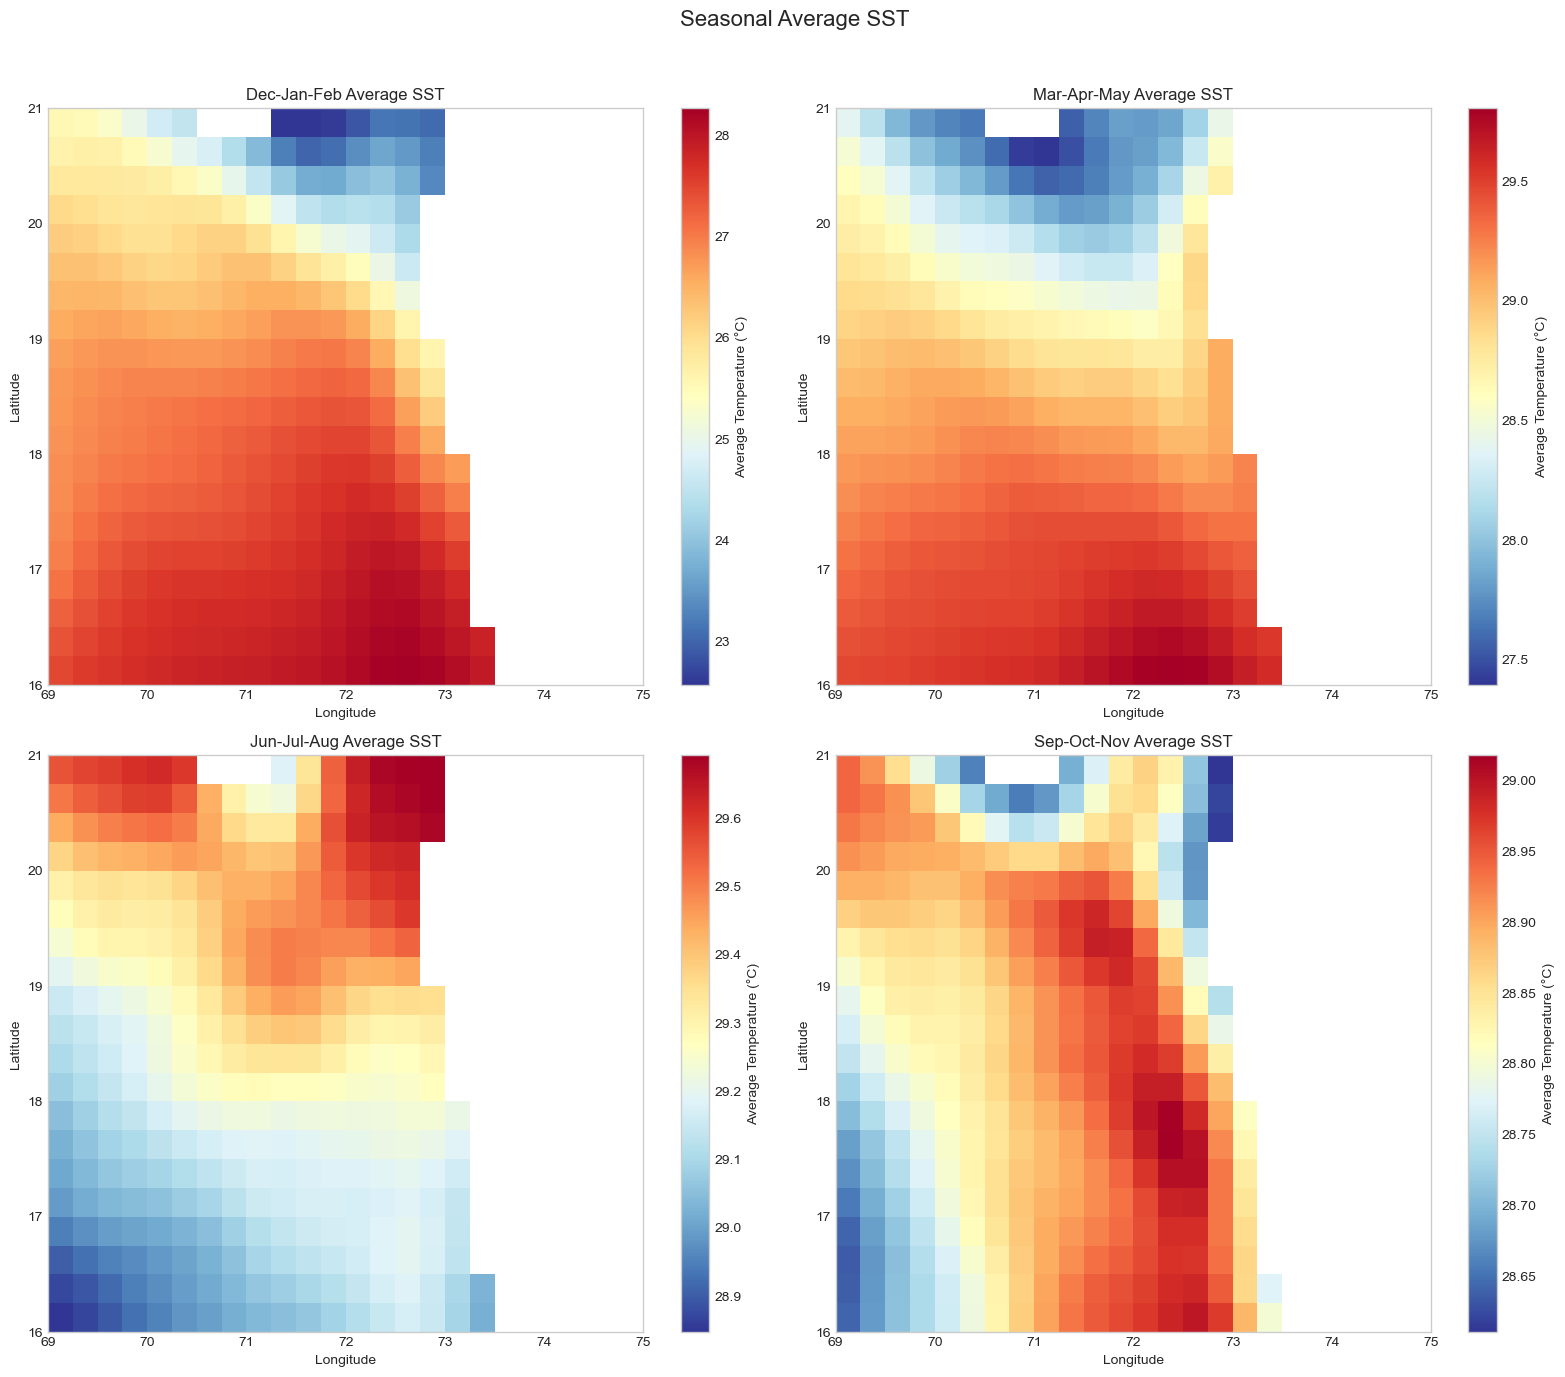

In [6]:
# For NOAA SST
fig_sst_seasonal = plot_seasonal_averages(ds_sst, 'sst')
fig_sst_seasonal.savefig(r'C:\Users\Admin\RIYA PROJECT\visualizations\sst noaa\noaa_sst_seasonal_averages.png', dpi=300, bbox_inches='tight')

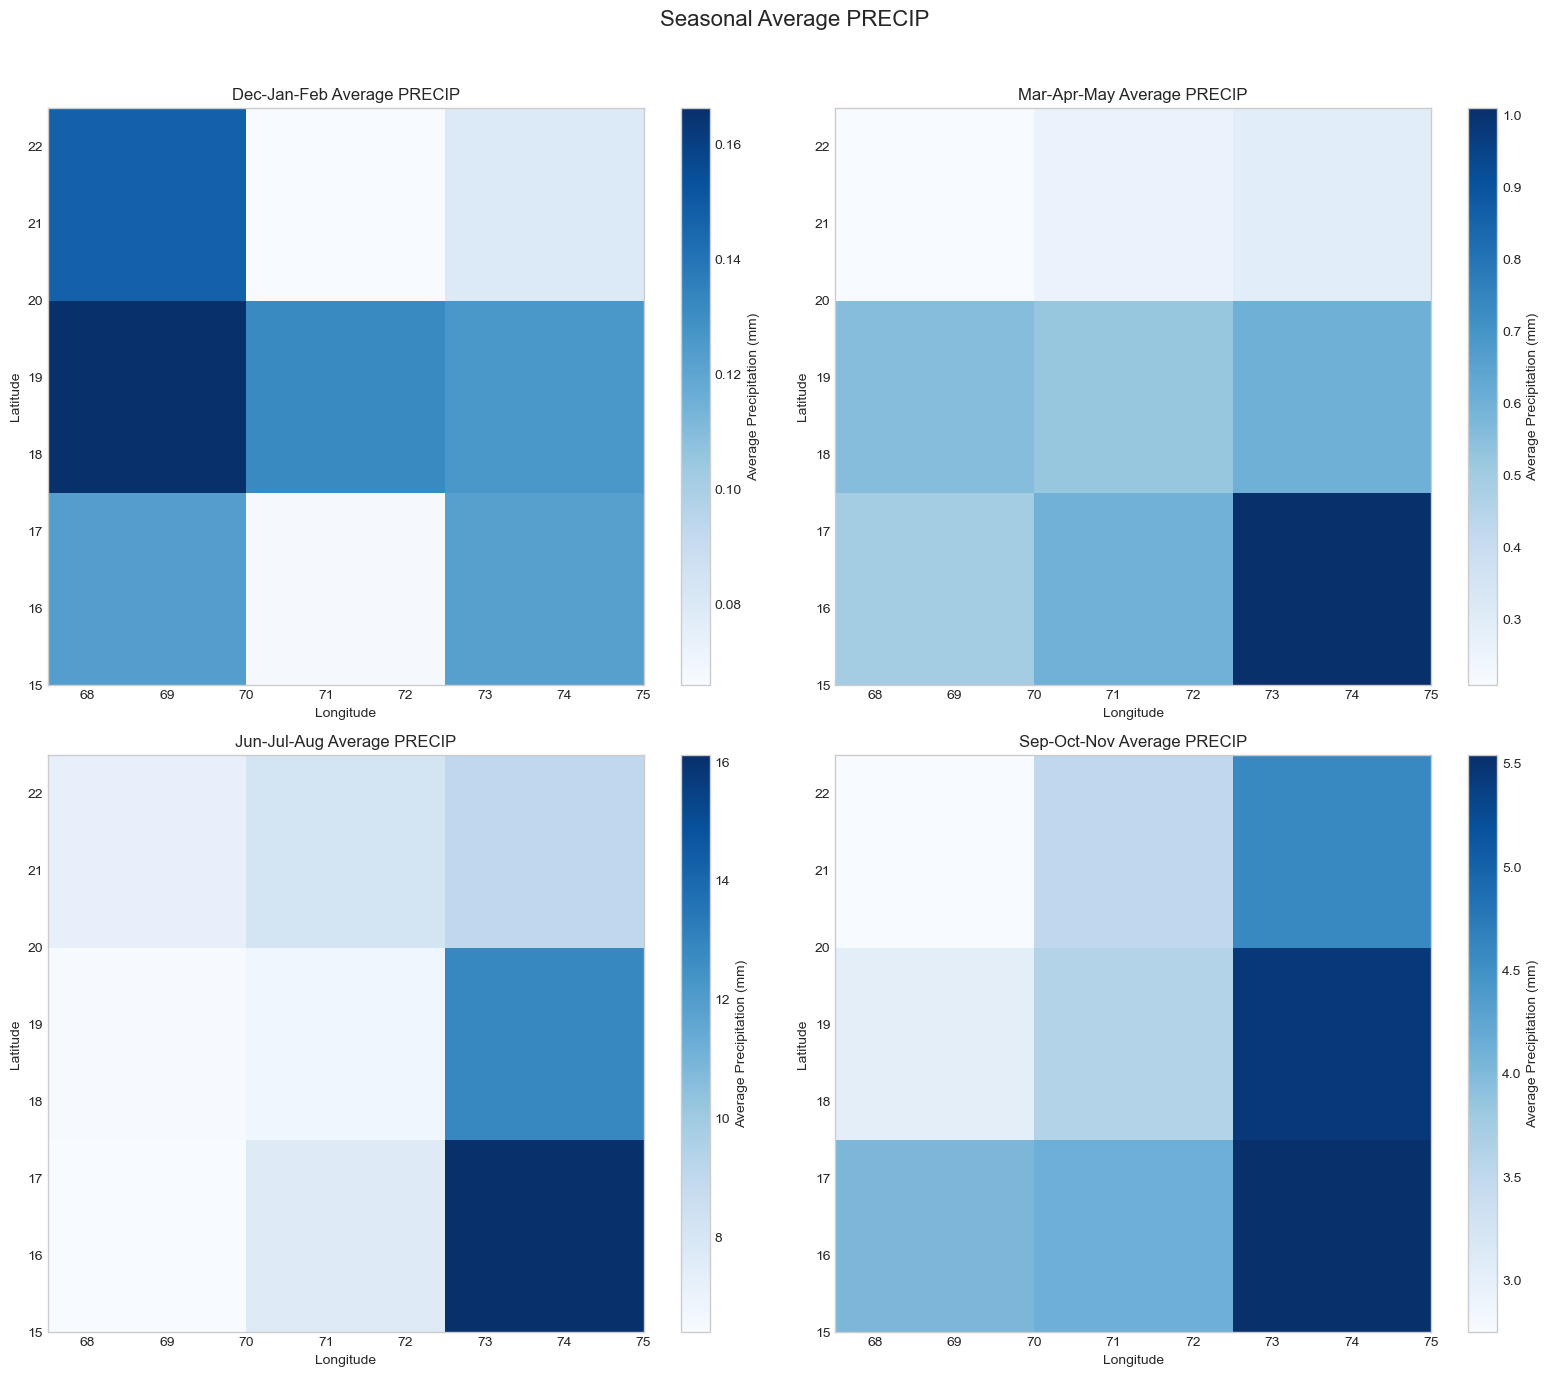

In [7]:
# 6: Plot seasonal averages
# For NOAA precipitation
fig_precip_seasonal = plot_seasonal_averages(ds_precip, 'precip')
fig_precip_seasonal.savefig(r'C:\Users\Admin\RIYA PROJECT\visualizations\precip\noaa_precip_seasonal_averages.png', dpi=300, bbox_inches='tight')

#  BAR PLOTS

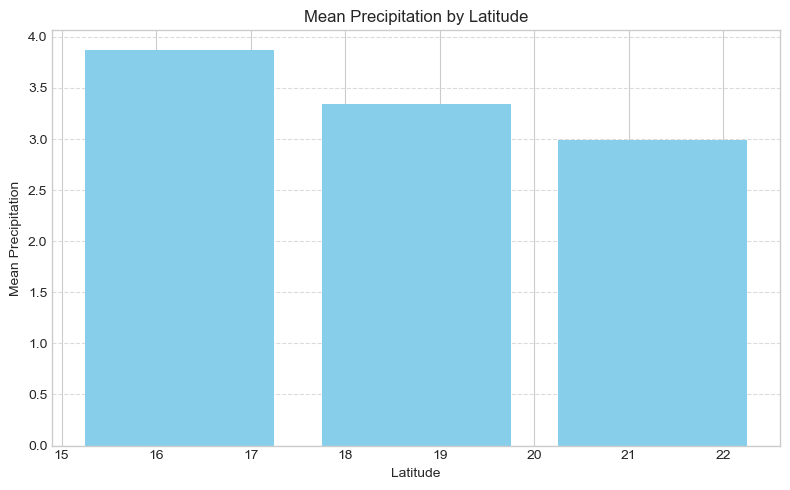

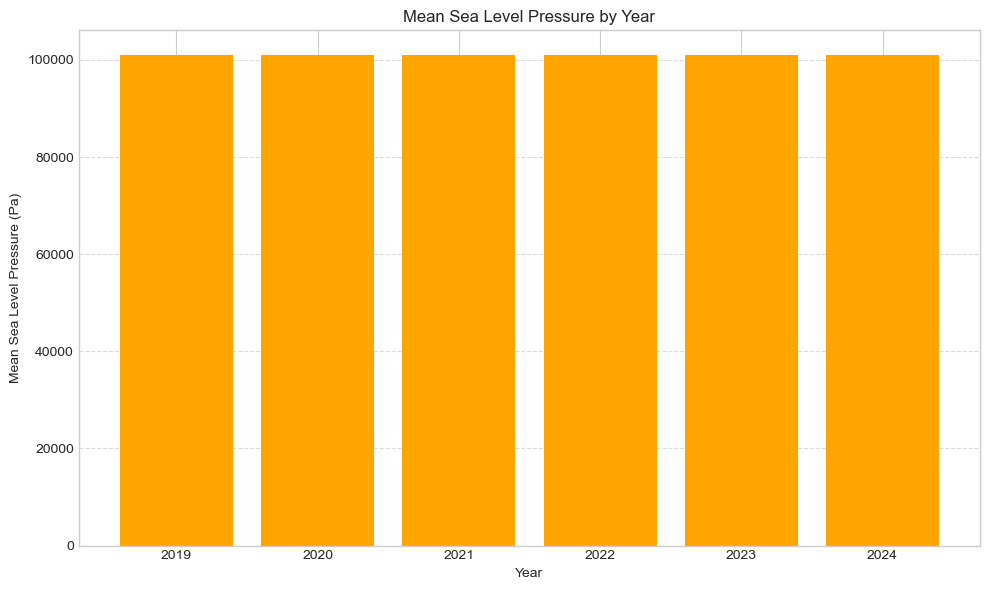

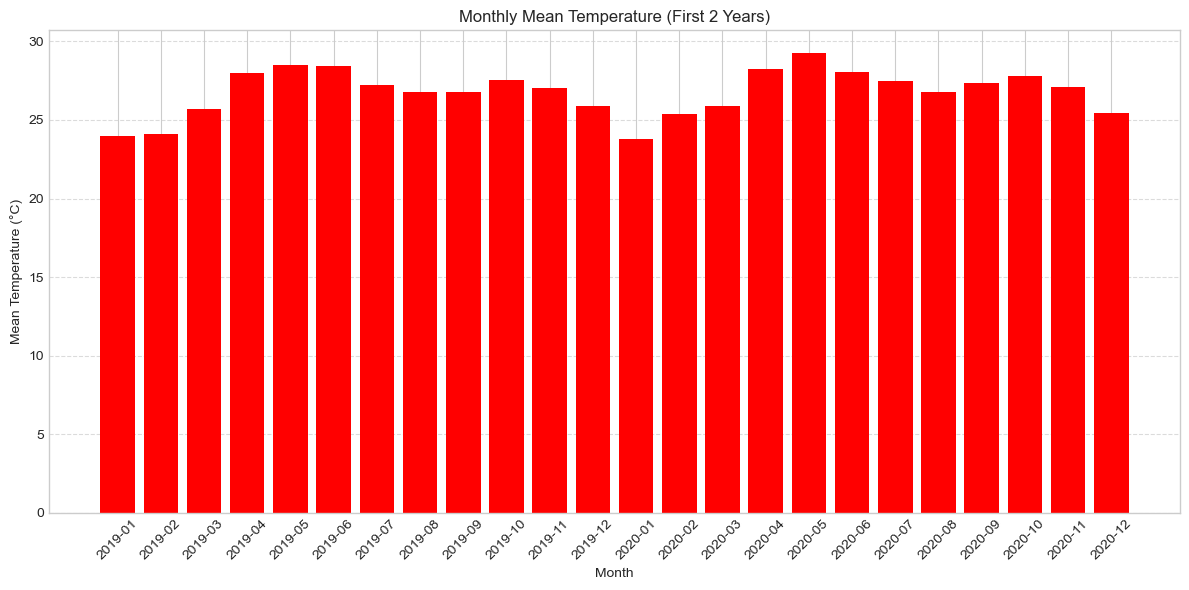

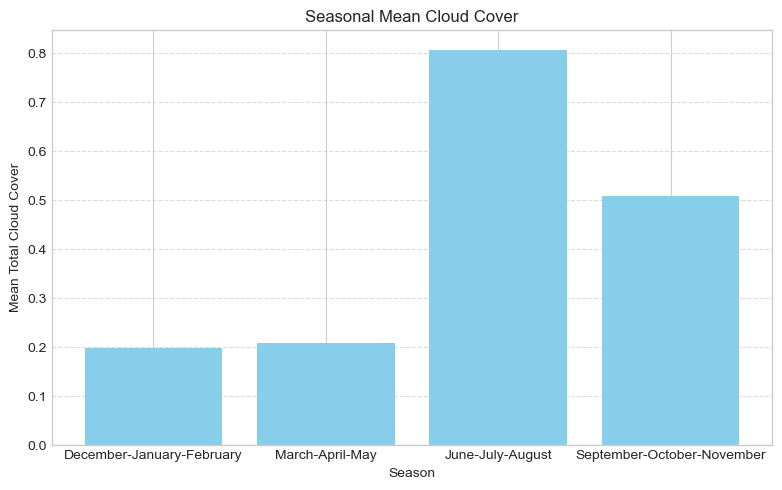

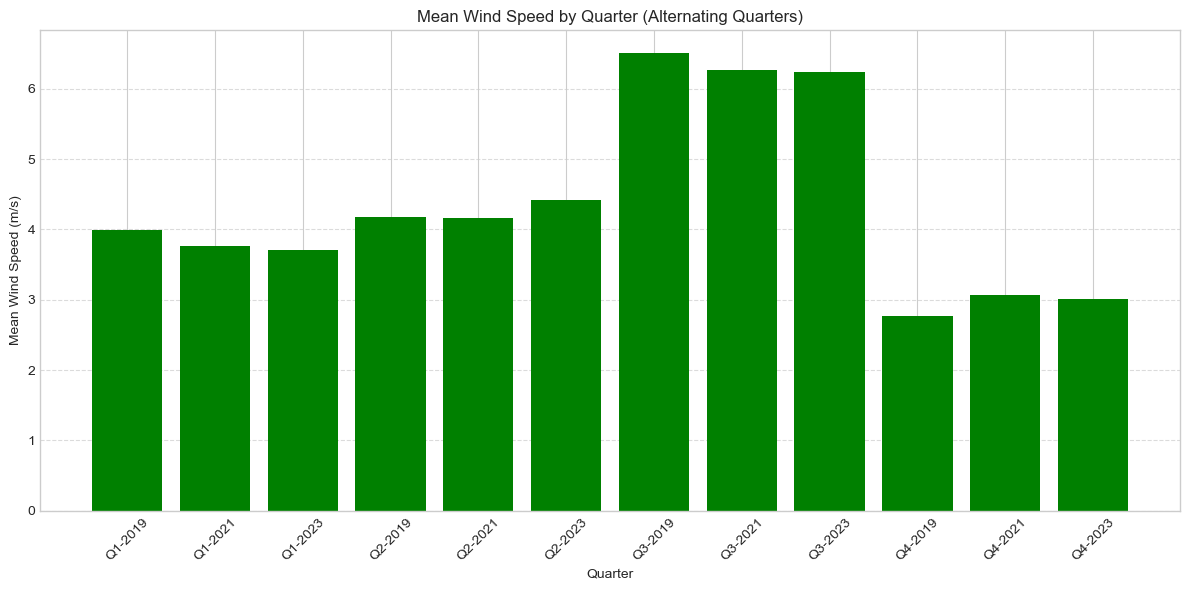

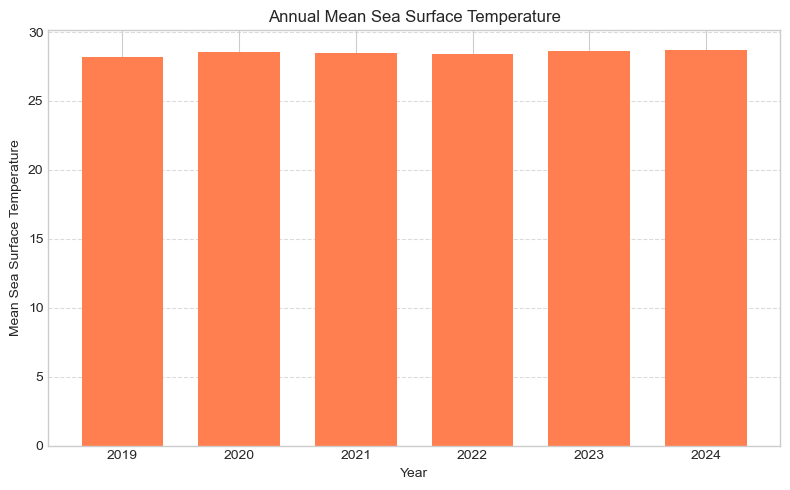

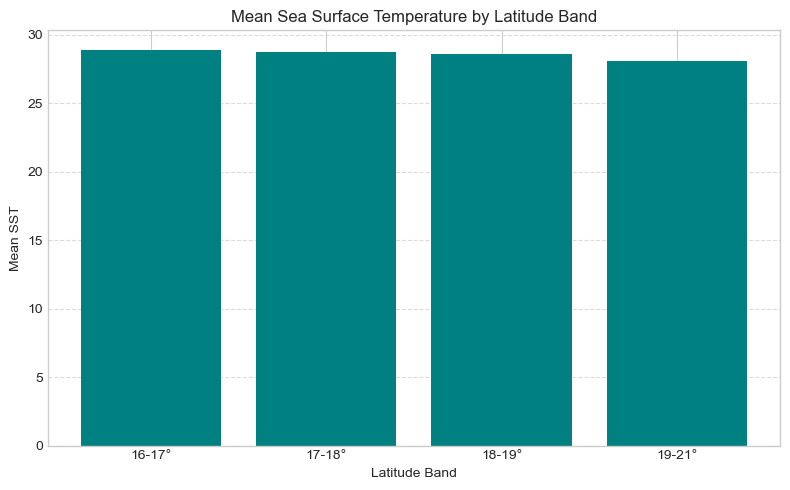

In [10]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# For NOAA Precipitation
def plot_noaa_precip(file_path):
    ds = xr.open_dataset(file_path)
   
    # Mean precipitation by latitude
    precip_by_lat = ds.precip.mean(dim=['lon', 'time'])
   
    plt.figure(figsize=(8, 5))
    plt.bar(ds.lat.values, precip_by_lat, width=2, color='skyblue')
    plt.xlabel('Latitude')
    plt.ylabel('Mean Precipitation')
    plt.title('Mean Precipitation by Latitude')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    #plt.savefig('noaa_precip_lat.png')
    plt.close()

# For ECMWF variables
def plot_ecmwf_vars(file_path):
    ds = xr.open_dataset(file_path)
   
    # For Mean Sea Level Pressure (msl)
    msl_mean = ds.msl.mean(dim=['latitude', 'longitude'])
   
    # Convert time to a more readable format for x-axis
    times = pd.to_datetime(ds.valid_time.values)
    years = [t.strftime('%Y') for t in times]
   
    # Get unique years for bars
    unique_years = sorted(set(years))
    yearly_msl = {year: [] for year in unique_years}
   
    # Organize data by year
    for i, year in enumerate(years):
        yearly_msl[year].append(msl_mean.values[i])
   
    # Calculate yearly means
    yearly_msl_mean = {year: np.mean(vals) for year, vals in yearly_msl.items()}
   
    # Plot MSL by year
    plt.figure(figsize=(10, 6))
    plt.bar(yearly_msl_mean.keys(), yearly_msl_mean.values(), color='orange')
    plt.xlabel('Year')
    plt.ylabel('Mean Sea Level Pressure (Pa)')
    plt.title('Mean Sea Level Pressure by Year')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    #plt.savefig('ecmwf_msl_yearly.png')
    plt.close()
   
    # For Temperature at 2m (t2m)
    # Convert Kelvin to Celsius
    t2m_mean = ds.t2m.mean(dim=['latitude', 'longitude']) - 273.15
   
    # Plot temperature as monthly bars
    months = [t.strftime('%Y-%m') for t in times]
   
    # Select just the first 24 months for better readability
    plt.figure(figsize=(12, 6))
    plt.bar(months[:24], t2m_mean[:24], color='red')
    plt.xlabel('Month')
    plt.ylabel('Mean Temperature (°C)')
    plt.title('Monthly Mean Temperature (First 2 Years)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    #plt.savefig('ecmwf_t2m_monthly.png')
    plt.close()
   
    # For Total Cloud Cover (tcc)
    # Seasonal cloud cover
    tcc_mean = ds.tcc.mean(dim=['latitude', 'longitude'])
    seasons = {'December-January-February': [12, 1, 2], 'March-April-May': [3, 4, 5],
               'June-July-August': [6, 7, 8], 'September-October-November': [9, 10, 11]}
   
    seasonal_tcc = {season: [] for season in seasons}
    for i, t in enumerate(times):
        for season, months in seasons.items():
            if t.month in months:
                seasonal_tcc[season].append(tcc_mean.values[i])
   
    seasonal_tcc_mean = {season: np.mean(vals) for season, vals in seasonal_tcc.items()}
   
    plt.figure(figsize=(8, 5))
    plt.bar(seasonal_tcc_mean.keys(), seasonal_tcc_mean.values(), color='skyblue')
    plt.xlabel('Season')
    plt.ylabel('Mean Total Cloud Cover')
    plt.title('Seasonal Mean Cloud Cover')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    #plt.savefig('ecmwf_tcc_seasonal.png')
    plt.close()
   
    # For Wind (u10, v10)
    # Calculate wind speed from u10 and v10 components
    wind_speed = np.sqrt(ds.u10**2 + ds.v10**2).mean(dim=['latitude', 'longitude'])
   
    # Group by quarter
    quarters = [f"Q{(t.month-1)//3+1}-{t.year}" for t in times]
    unique_quarters = sorted(set(quarters))
    quarterly_wind = {q: [] for q in unique_quarters}
   
    for i, q in enumerate(quarters):
        quarterly_wind[q].append(wind_speed.values[i])
   
    quarterly_wind_mean = {q: np.mean(vals) for q, vals in quarterly_wind.items()}
   
    plt.figure(figsize=(12, 6))
    plt.bar(list(quarterly_wind_mean.keys())[::2], list(quarterly_wind_mean.values())[::2], color='green')
    plt.xlabel('Quarter')
    plt.ylabel('Mean Wind Speed (m/s)')
    plt.title('Mean Wind Speed by Quarter (Alternating Quarters)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    #plt.savefig('ecmwf_wind_quarterly.png')
    plt.close()

# For NOAA SST
def plot_noaa_sst(file_path):
    ds = xr.open_dataset(file_path)
   
    # Mean SST by time
    sst_mean = ds.sst.mean(dim=['lat', 'lon'])
   
    # Convert to pandas for easier manipulation
    sst_df = pd.DataFrame({'sst': sst_mean.values},
                         index=pd.to_datetime(ds.time.values))
   
    # Annual mean
    annual_sst = sst_df.resample('Y').mean()
   
    plt.figure(figsize=(8, 5))
    plt.bar(annual_sst.index.year, annual_sst.sst, width=0.7, color='coral')
    plt.xlabel('Year')
    plt.ylabel('Mean Sea Surface Temperature')
    plt.title('Annual Mean Sea Surface Temperature')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    #plt.savefig('noaa_sst_annual.png')
    plt.close()
   
    # Alternative version: SST by lat band
    lat_bands = [(16, 17), (17, 18), (18, 19), (19, 21)]
    lat_band_labels = [f"{low}-{high}°" for low, high in lat_bands]
   
    lat_band_values = []
    for low, high in lat_bands:
        mask = (ds.lat >= low) & (ds.lat < high)
        band_mean = ds.sst.where(mask).mean(dim=['lat', 'lon', 'time']).values
        lat_band_values.append(float(band_mean))
   
    plt.figure(figsize=(8, 5))
    plt.bar(lat_band_labels, lat_band_values, color='teal')
    plt.xlabel('Latitude Band')
    plt.ylabel('Mean SST')
    plt.title('Mean Sea Surface Temperature by Latitude Band')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    #plt.savefig('noaa_sst_latband.png')
    plt.show()
    plt.close()


plot_noaa_precip(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\precip_konkan.nc")
plot_ecmwf_vars(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\ECMWF - skt , v10 ,u10 , msl ,tcc , 2m temp.nc")
plot_noaa_sst(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\noaa_sst_masked.nc")

# Contour plots

In [22]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import cartopy.crs as ccrs
import cmocean
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
from matplotlib.gridspec import GridSpec

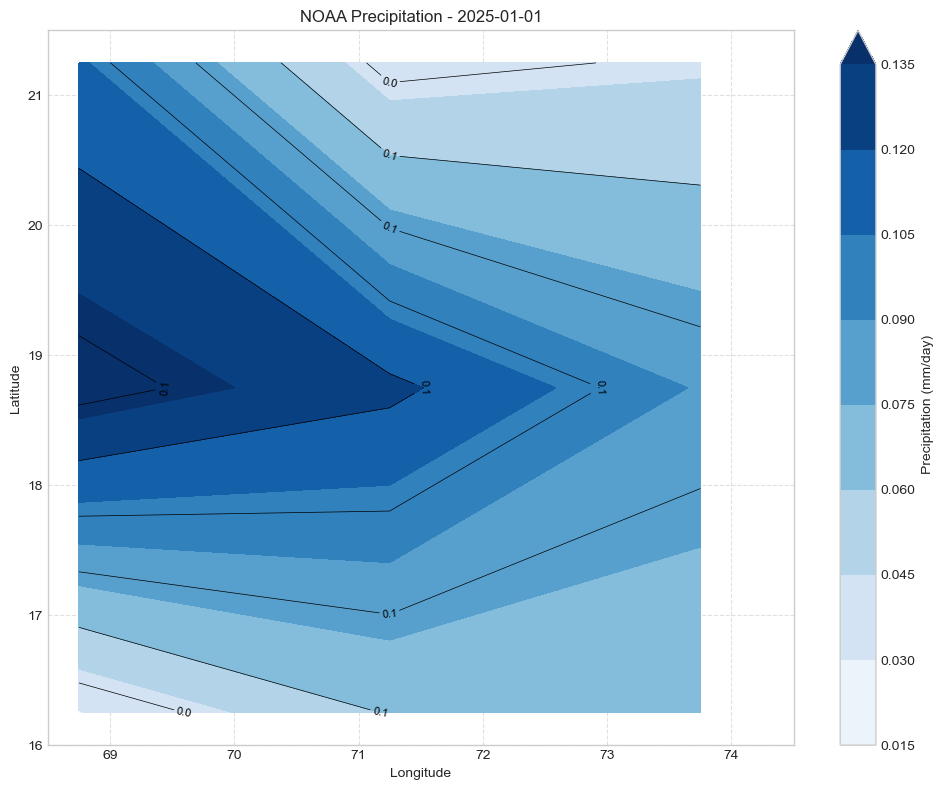

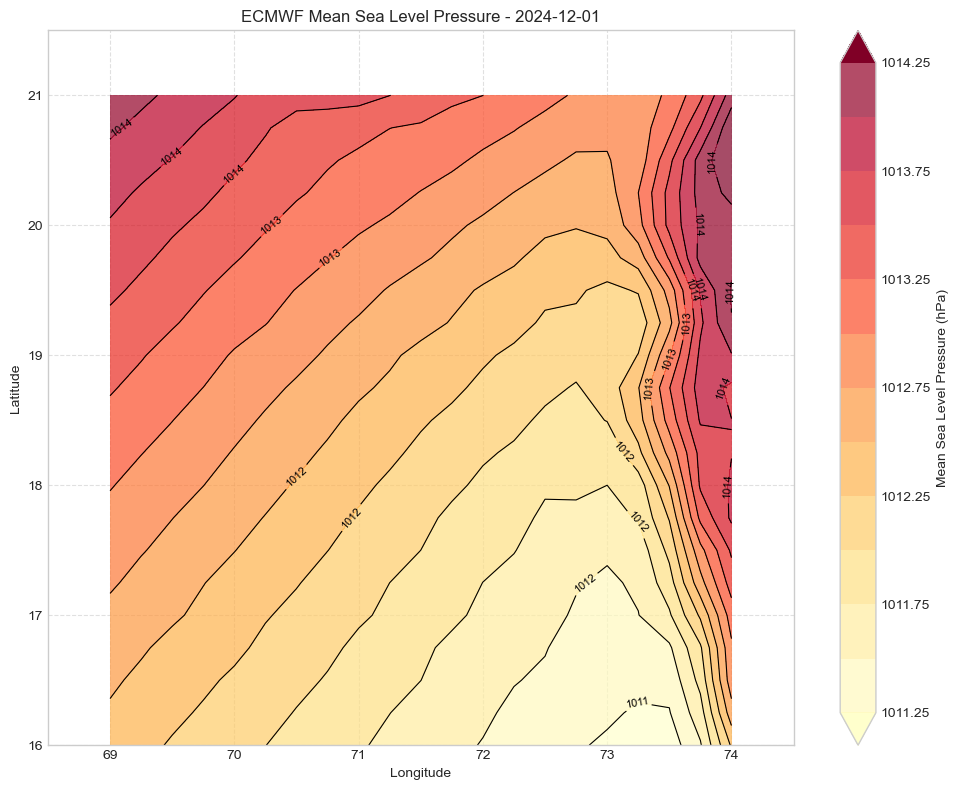

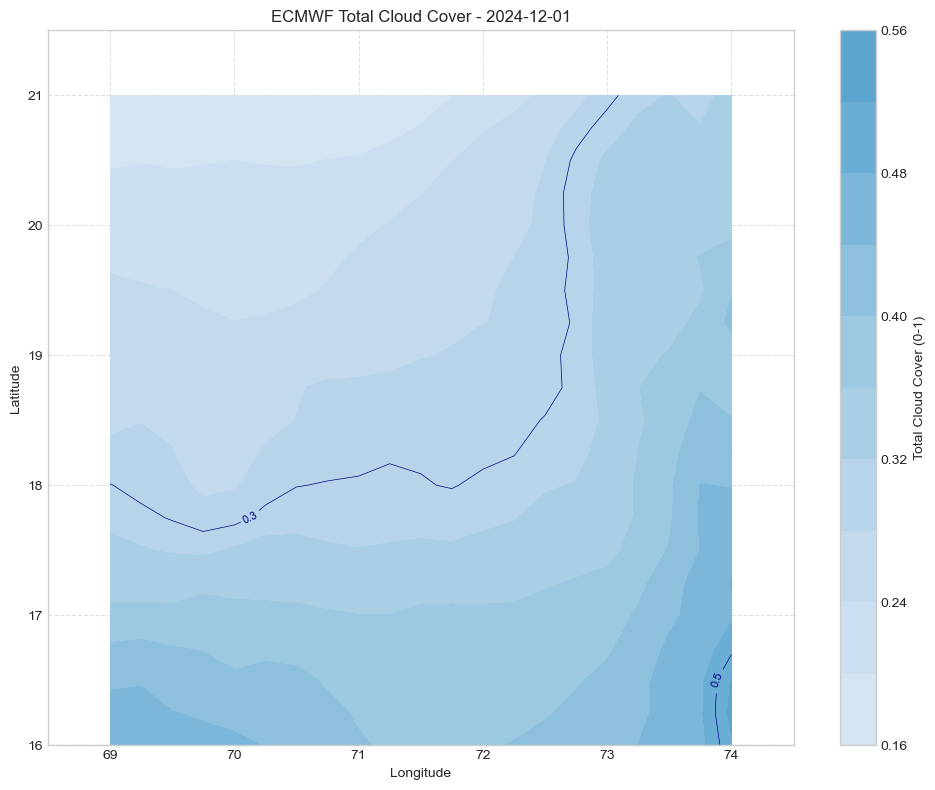

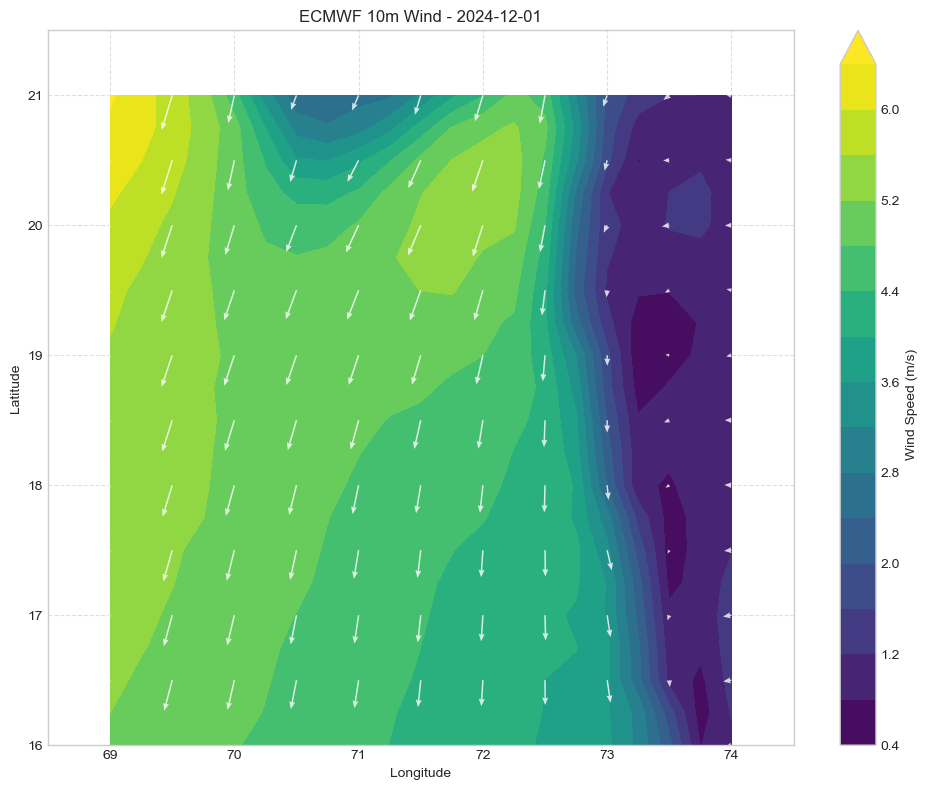

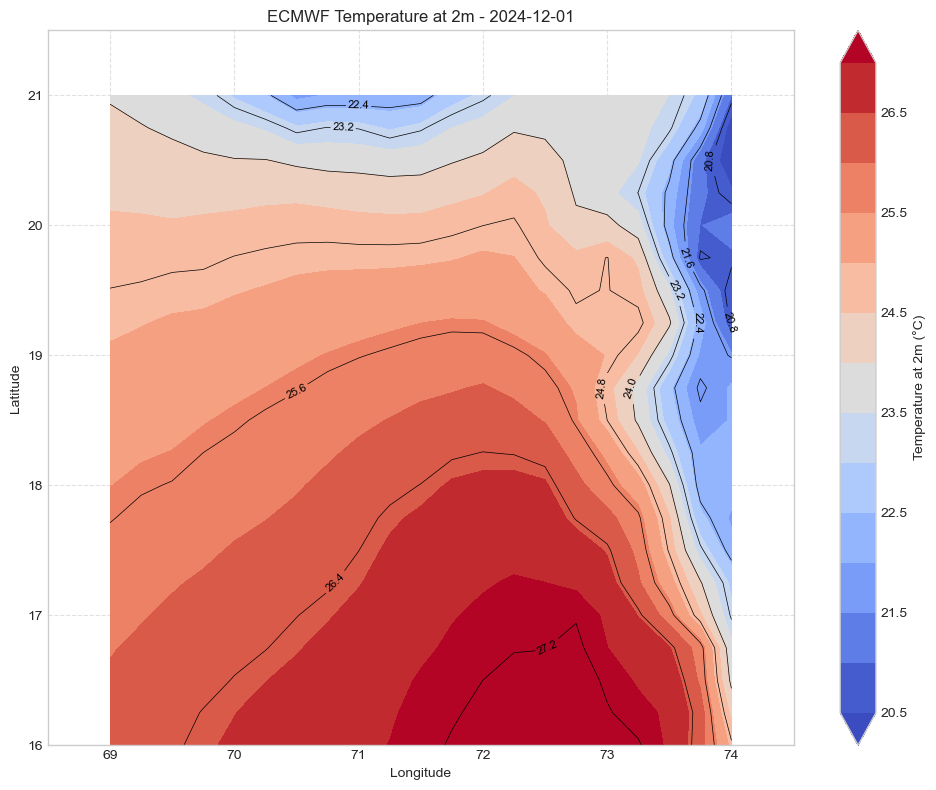

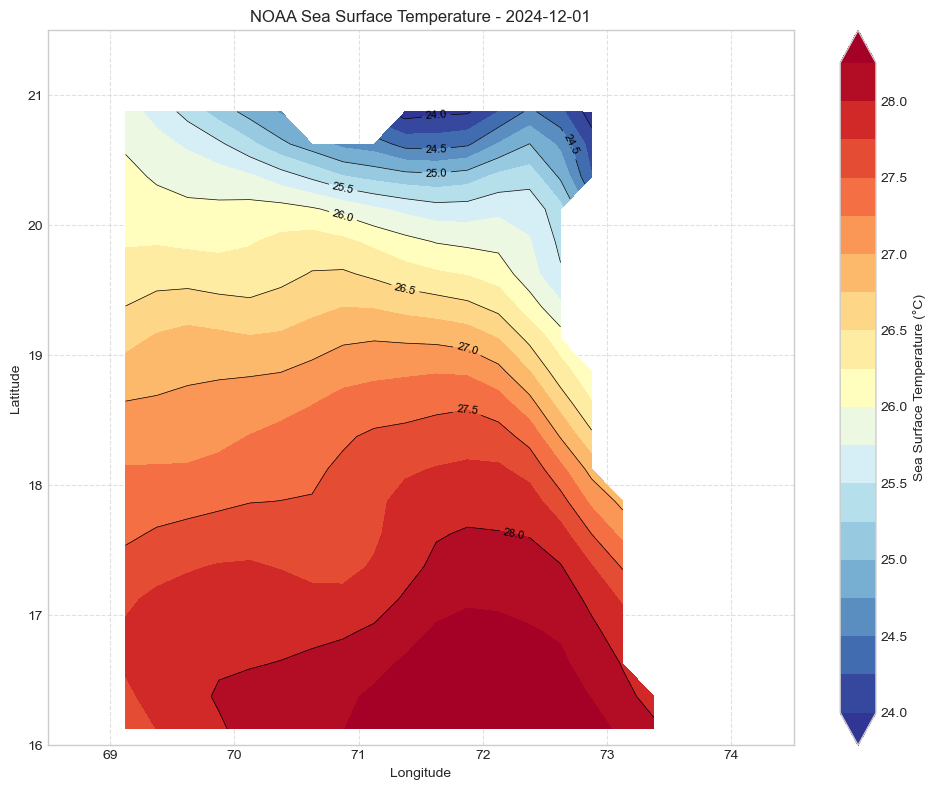

In [24]:
# Define a common plotting area
lat_min, lat_max = 16.0, 21.5
lon_min, lon_max = 68.5, 74.5

# ---- NOAA Precipitation ----
def plot_precipitation(noaa_precip_file):
    ds = xr.open_dataset(noaa_precip_file)
   
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
   
    # Select latest time for demonstration
    latest_time = ds.time[-1].values
   
    # Create contour plot with custom colormap
    contour = plt.contourf(
        ds.lon, ds.lat, ds.precip.sel(time=latest_time),
        cmap='Blues',
        levels=10,
        extend='max'
    )
   
    # Add contour lines
    lines = plt.contour(
        ds.lon, ds.lat, ds.precip.sel(time=latest_time),
        colors='black',
        linewidths=0.5,
        levels=5
    )
    plt.clabel(lines, inline=True, fontsize=8, fmt='%.1f')
   
    # Add grid
    plt.grid(linestyle='--', alpha=0.6)
   
    # Add colorbar
    cbar = plt.colorbar(contour)
    cbar.set_label('Precipitation (mm/day)')
   
    # Set title and limits
    plt.title(f'NOAA Precipitation - {np.datetime_as_string(latest_time, unit="D")}')
    plt.xlim(lon_min, lon_max)
    plt.ylim(lat_min, lat_max)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
   
    plt.tight_layout()
    plt.show()
    #plt.savefig('noaa_precipitation.png', dpi=300)
    plt.close()

# ---- ECMWF Variables ----
def plot_ecmwf_msl(ecmwf_file):
    ds = xr.open_dataset(ecmwf_file)
   
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
   
    # Select latest time for demonstration
    latest_time = ds.valid_time[-1].values
   
    # Convert to hPa for better readability
    msl_hpa = ds.msl.sel(valid_time=latest_time) / 100
   
    # Create contour plot
    contour = plt.contourf(
        ds.longitude, ds.latitude, msl_hpa,
        cmap='YlOrRd',
        levels=15,
        alpha=0.7,
        extend='both'
    )
   
    # Add contour lines
    lines = plt.contour(
        ds.longitude, ds.latitude, msl_hpa,
        colors='black',
        linewidths=0.8,
        levels=15
    )
    plt.clabel(lines, inline=True, fontsize=8, fmt='%1.0f')
   
    # Add grid
    plt.grid(linestyle='--', alpha=0.6)
   
    # Add colorbar
    cbar = plt.colorbar(contour)
    cbar.set_label('Mean Sea Level Pressure (hPa)')
   
    # Set title and limits
    plt.title(f'ECMWF Mean Sea Level Pressure - {np.datetime_as_string(latest_time, unit="D")}')
    plt.xlim(lon_min, lon_max)
    plt.ylim(lat_min, lat_max)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
   
    plt.tight_layout()
    plt.show()
    #plt.savefig('ecmwf_msl.png', dpi=300)
    plt.close()

def plot_ecmwf_tcc(ecmwf_file):
    ds = xr.open_dataset(ecmwf_file)
   
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
   
    # Select latest time for demonstration
    latest_time = ds.valid_time[-1].values
   
    # Create contour plot
    norm = colors.Normalize(vmin=0, vmax=1)  # TCC values range from 0-1
    contour = plt.contourf(
        ds.longitude, ds.latitude, ds.tcc.sel(valid_time=latest_time),
        cmap='Blues',
        norm=norm,
        levels=10,
        extend='neither'
    )
   
    # Add contour lines
    lines = plt.contour(
        ds.longitude, ds.latitude, ds.tcc.sel(valid_time=latest_time),
        colors='navy',
        linewidths=0.5,
        levels=[0.1, 0.3, 0.5, 0.7, 0.9]
    )
    plt.clabel(lines, inline=True, fontsize=8, fmt='%.1f')
   
    # Add grid
    plt.grid(linestyle='--', alpha=0.6)
   
    # Add colorbar
    cbar = plt.colorbar(contour)
    cbar.set_label('Total Cloud Cover (0-1)')
   
    # Set title and limits
    plt.title(f'ECMWF Total Cloud Cover - {np.datetime_as_string(latest_time, unit="D")}')
    plt.xlim(lon_min, lon_max)
    plt.ylim(lat_min, lat_max)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
   
    plt.tight_layout()
    plt.show()
    #plt.savefig('ecmwf_tcc.png', dpi=300)
    plt.close()

def plot_ecmwf_wind(ecmwf_file):
    ds = xr.open_dataset(ecmwf_file)
   
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
   
    # Select latest time for demonstration
    latest_time = ds.valid_time[-1].values
   
    # Calculate wind speed
    u = ds.u10.sel(valid_time=latest_time)
    v = ds.v10.sel(valid_time=latest_time)
    wind_speed = np.sqrt(u**2 + v**2)
   
    # Create contour plot with speed shading
    contour = plt.contourf(
        ds.longitude, ds.latitude, wind_speed,
        cmap='viridis',
        levels=15,
        extend='max'
    )
   
    # Add wind vectors, subsample for clarity
    x = ds.longitude.values[::2]
    y = ds.latitude.values[::2]
    plt.quiver(
        x, y,
        u.values[::2, ::2], v.values[::2, ::2],
        scale=120, width=0.002, headwidth=4, alpha=0.8, color='white'
    )
   
    # Add grid
    plt.grid(linestyle='--', alpha=0.6)
   
    # Add colorbar
    cbar = plt.colorbar(contour)
    cbar.set_label('Wind Speed (m/s)')
   
    # Set title and limits
    plt.title(f'ECMWF 10m Wind - {np.datetime_as_string(latest_time, unit="D")}')
    plt.xlim(lon_min, lon_max)
    plt.ylim(lat_min, lat_max)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
   
    plt.tight_layout()
    plt.show()
    #plt.savefig('ecmwf_wind.png', dpi=300)
    plt.close()

def plot_ecmwf_t2m(ecmwf_file):
    ds = xr.open_dataset(ecmwf_file)
   
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
   
    # Select latest time for demonstration
    latest_time = ds.valid_time[-1].values
   
    # Create contour plot with custom colormap
    # Convert from Kelvin to Celsius
    temp_celsius = ds.t2m.sel(valid_time=latest_time) - 273.15
   
    contour = plt.contourf(
        ds.longitude, ds.latitude, temp_celsius,
        cmap='coolwarm',
        levels=15,
        extend='both'
    )
   
    # Add contour lines
    lines = plt.contour(
        ds.longitude, ds.latitude, temp_celsius,
        colors='black',
        linewidths=0.5,
        levels=10
    )
    plt.clabel(lines, inline=True, fontsize=8, fmt='%.1f')
   
    # Add grid
    plt.grid(linestyle='--', alpha=0.6)
   
    # Add colorbar
    cbar = plt.colorbar(contour)
    cbar.set_label('Temperature at 2m (°C)')
   
    # Set title and limits
    plt.title(f'ECMWF Temperature at 2m - {np.datetime_as_string(latest_time, unit="D")}')
    plt.xlim(lon_min, lon_max)
    plt.ylim(lat_min, lat_max)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
   
    plt.tight_layout()
    plt.show()
    #plt.savefig('ecmwf_t2m.png', dpi=300)
    plt.close()

# ---- NOAA SST ----
def plot_sst(noaa_sst_file):
    ds = xr.open_dataset(noaa_sst_file)
   
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
   
    # Select latest time for demonstration
    latest_time = ds.time[-1].values
   
    # Create contour plot
    contour = plt.contourf(
        ds.lon, ds.lat, ds.sst.sel(time=latest_time),
        cmap='RdYlBu_r',  # Red-Yellow-Blue reversed
        levels=20,
        extend='both'
    )
   
    # Add contour lines
    lines = plt.contour(
        ds.lon, ds.lat, ds.sst.sel(time=latest_time),
        colors='black',
        linewidths=0.5,
        levels=10
    )
    plt.clabel(lines, inline=True, fontsize=8, fmt='%.1f')
   
    # Add grid
    plt.grid(linestyle='--', alpha=0.6)
   
    # Add colorbar
    cbar = plt.colorbar(contour)
    cbar.set_label('Sea Surface Temperature (°C)')
   
    # Set title and limits
    plt.title(f'NOAA Sea Surface Temperature - {np.datetime_as_string(latest_time, unit="D")}')
    plt.xlim(lon_min, lon_max)
    plt.ylim(lat_min, lat_max)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
   
    plt.tight_layout()
    plt.show()
    #plt.savefig('noaa_sst.png', dpi=300)
    plt.close()


plot_precipitation(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\precip_konkan.nc")
plot_ecmwf_msl(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\ECMWF - skt , v10 ,u10 , msl ,tcc , 2m temp.nc")
plot_ecmwf_tcc(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\ECMWF - skt , v10 ,u10 , msl ,tcc , 2m temp.nc")
plot_ecmwf_wind(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\ECMWF - skt , v10 ,u10 , msl ,tcc , 2m temp.nc")
plot_ecmwf_t2m(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\ECMWF - skt , v10 ,u10 , msl ,tcc , 2m temp.nc")
plot_sst(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\noaa_sst_masked.nc")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# ---- Common Parameters ----
# Create sample coordinates matching your data dimensions
lat_noaa = np.linspace(16.25, 21.25, 3)  # NOAA Precip
lon_noaa = np.linspace(68.75, 73.75, 3)
lat_ecmwf = np.linspace(16.0, 21.0, 21)  # ECMWF
lon_ecmwf = np.linspace(69.0, 74.0, 21)
lat_sst = np.linspace(16.12, 20.88, 20)  # NOAA SST
lon_sst = np.linspace(69.12, 73.88, 20)

# ---- Function to plot precipitation ----
def plot_precipitation():
    # Create synthetic precipitation data
    xx, yy = np.meshgrid(lon_noaa, lat_noaa)
    data = 5 * np.sin(xx/10) * np.cos(yy/10) + 10
    data = np.maximum(0, data)  # No negative precipitation
   
    # Interpolate to higher resolution for smoother plot
    from scipy.interpolate import interp2d
    f = interp2d(lon_noaa, lat_noaa, data, kind='cubic')
   
    lon_new = np.linspace(lon_noaa.min(), lon_noaa.max(), 100)
    lat_new = np.linspace(lat_noaa.min(), lat_noaa.max(), 100)
    data_new = f(lon_new, lat_new)
   
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
   
    # Create contour plot
    contour = ax.contourf(lon_new, lat_new, data_new,
                         levels=10, cmap='Blues', extend='max')
   
    # Add contour lines
    contour_lines = ax.contour(lon_new, lat_new, data_new,
                              levels=5, colors='black', linewidths=0.5)
    plt.clabel(contour_lines, inline=True, fontsize=8, fmt='%.1f')
   
    # Add grid and labels
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
   
    # Add colorbar
    cbar = plt.colorbar(contour, ax=ax)
    cbar.set_label('Precipitation (mm/day)')
   
    ax.set_title('NOAA Precipitation')
    plt.tight_layout()
   
    return fig

# ---- Function to plot ECMWF MSL Pressure ----
def plot_msl():
    # Create synthetic MSL data
    xx, yy = np.meshgrid(lon_ecmwf, lat_ecmwf)
    data = 1013 + 10 * np.sin(xx/15) * np.cos(yy/15)
   
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
   
    # Create filled contours
    contour = ax.contourf(lon_ecmwf, lat_ecmwf, data,
                         levels=15, cmap='YlOrRd', alpha=0.7, extend='both')
   
    # Add contour lines
    contour_lines = ax.contour(lon_ecmwf, lat_ecmwf, data,
                              levels=10, colors='black', linewidths=0.8)
    plt.clabel(contour_lines, inline=True, fontsize=8, fmt='%1.0f')
   
    # Add grid and labels
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
   
    # Add colorbar
    cbar = plt.colorbar(contour, ax=ax)
    cbar.set_label('Mean Sea Level Pressure (hPa)')
   
    ax.set_title('ECMWF Mean Sea Level Pressure')
    plt.tight_layout()
   
    return fig

# ---- Function to plot ECMWF Total Cloud Cover ----
def plot_tcc():
    # Create synthetic TCC data
    xx, yy = np.meshgrid(lon_ecmwf, lat_ecmwf)
    data = 0.5 + 0.4 * np.sin(xx/10) * np.cos(yy/10)
    data = np.clip(data, 0, 1)  # Cloud cover is between 0-1
   
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
   
    # Create filled contours
    contour = ax.contourf(lon_ecmwf, lat_ecmwf, data,
                         levels=10, cmap='Blues', extend='both')
   
    # Add contour lines
    contour_lines = ax.contour(lon_ecmwf, lat_ecmwf, data,
                              levels=[0.1, 0.3, 0.5, 0.7, 0.9],
                              colors='navy', linewidths=0.5)
    plt.clabel(contour_lines, inline=True, fontsize=8)
   
    # Add grid and labels
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
   
    # Add colorbar
    cbar = plt.colorbar(contour, ax=ax)
    cbar.set_label('Total Cloud Cover (0-1)')
   
    ax.set_title('ECMWF Total Cloud Cover')
    plt.tight_layout()
   
    return fig

# ---- Function to plot ECMWF Wind ----
def plot_wind():
    # Create synthetic wind data
    xx, yy = np.meshgrid(lon_ecmwf, lat_ecmwf)
   
    # U component (east-west)
    u = 5 * np.sin(xx/5) * np.cos(yy/6)
   
    # V component (north-south)
    v = 5 * np.cos(xx/6) * np.sin(yy/5)
   
    # Wind speed
    speed = np.sqrt(u**2 + v**2)
   
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
   
    # Create filled contours for wind speed
    contour = ax.contourf(lon_ecmwf, lat_ecmwf, speed,
                         levels=15, cmap='viridis', extend='max')
   
    # Add wind vectors (quiver plot)
    # Subsample for clarity
    skip = 2
    ax.quiver(lon_ecmwf[::skip], lat_ecmwf[::skip],
             u[::skip, ::skip], v[::skip, ::skip],
             color='white', scale=50, alpha=0.8)
   
    # Add grid and labels
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
   
    # Add colorbar
    cbar = plt.colorbar(contour, ax=ax)
    cbar.set_label('Wind Speed (m/s)')
   
    ax.set_title('ECMWF 10m Wind')
    plt.tight_layout()
   
    return fig

# ---- Function to plot ECMWF Temperature ----
def plot_t2m():
    # Create synthetic temperature data
    xx, yy = np.meshgrid(lon_ecmwf, lat_ecmwf)
    data = 25 + 5 * np.sin(xx/10) * np.cos(yy/10)  # Celsius
   
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
   
    # Create filled contours
    contour = ax.contourf(lon_ecmwf, lat_ecmwf, data,
                         levels=15, cmap='coolwarm', extend='both')
   
    # Add contour lines
    contour_lines = ax.contour(lon_ecmwf, lat_ecmwf, data,
                              levels=10, colors='black', linewidths=0.5)
    plt.clabel(contour_lines, inline=True, fontsize=8, fmt='%.1f')
   
    # Add grid and labels
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
   
    # Add colorbar
    cbar = plt.colorbar(contour, ax=ax)
    cbar.set_label('Temperature at 2m (°C)')
   
    ax.set_title('ECMWF Temperature at 2m')
    plt.tight_layout()
   
    return fig

# ---- Function to plot NOAA SST ----
def plot_sst():
    # Create synthetic SST data
    xx, yy = np.meshgrid(lon_sst, lat_sst)
    data = 25 + 3 * np.sin(xx/10) * np.cos(yy/10)  # Celsius
   
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
   
    # Create filled contours
    contour = ax.contourf(lon_sst, lat_sst, data,
                         levels=20, cmap='plasma', extend='both')
   
    # Add contour lines
    contour_lines = ax.contour(lon_sst, lat_sst, data,
                              levels=10, colors='black', linewidths=0.5)
    plt.clabel(contour_lines, inline=True, fontsize=8, fmt='%.1f')
   
    # Add grid and labels
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
   
    # Add colorbar
    cbar = plt.colorbar(contour, ax=ax)
    cbar.set_label('Sea Surface Temperature (°C)')
   
    ax.set_title('NOAA Sea Surface Temperature')
    plt.tight_layout()
   
    return fig

# ---- Function to plot combined ECMWF panel ----
def plot_ecmwf_panel():
    # Create figure with 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
   
    # --- MSL Pressure Plot ---
    ax1 = axes[0, 0]
    xx, yy = np.meshgrid(lon_ecmwf, lat_ecmwf)
    msl_data = 1013 + 10 * np.sin(xx/15) * np.cos(yy/15)
   
    cf1 = ax1.contourf(lon_ecmwf, lat_ecmwf, msl_data,
                      levels=15, cmap='YlOrRd', alpha=0.7, extend='both')
    cs1 = ax1.contour(lon_ecmwf, lat_ecmwf, msl_data,
                     levels=10, colors='black', linewidths=0.8)
    plt.clabel(cs1, inline=True, fontsize=8, fmt='%1.0f')
   
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Latitude')
    cbar1 = plt.colorbar(cf1, ax=ax1, orientation='horizontal', pad=0.05, shrink=0.8)
    cbar1.set_label('MSLP (hPa)')
    ax1.set_title('Mean Sea Level Pressure')
   
    # --- Temperature Plot ---
    ax2 = axes[0, 1]
    temp_data = 25 + 5 * np.sin(xx/10) * np.cos(yy/10)
   
    cf2 = ax2.contourf(lon_ecmwf, lat_ecmwf, temp_data,
                      levels=15, cmap='coolwarm', extend='both')
    cs2 = ax2.contour(lon_ecmwf, lat_ecmwf, temp_data,
                     levels=10, colors='black', linewidths=0.5)
    plt.clabel(cs2, inline=True, fontsize=8, fmt='%.1f')
   
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.set_xlabel('Longitude')
    ax2.set_ylabel('Latitude')
    cbar2 = plt.colorbar(cf2, ax=ax2, orientation='horizontal', pad=0.05, shrink=0.8)
    cbar2.set_label('Temperature (°C)')
    ax2.set_title('Temperature at 2m')
   
    # --- Wind Plot ---
    ax3 = axes[1, 0]
    u = 5 * np.sin(xx/5) * np.cos(yy/6)
    v = 5 * np.cos(xx/6) * np.sin(yy/5)
    speed = np.sqrt(u**2 + v**2)
   
    cf3 = ax3.contourf(lon_ecmwf, lat_ecmwf, speed,
                      levels=15, cmap='viridis', extend='max')
   
    skip = 2
    ax3.quiver(lon_ecmwf[::skip], lat_ecmwf[::skip],
              u[::skip, ::skip], v[::skip, ::skip],
              color='white', scale=50, alpha=0.8)
   
    ax3.grid(True, linestyle='--', alpha=0.7)
    ax3.set_xlabel('Longitude')
    ax3.set_ylabel('Latitude')
    cbar3 = plt.colorbar(cf3, ax=ax3, orientation='horizontal', pad=0.05, shrink=0.8)
    cbar3.set_label('Wind Speed (m/s)')
    ax3.set_title('10m Wind')
   
    # --- Cloud Cover Plot ---
    ax4 = axes[1, 1]
    tcc_data = 0.5 + 0.4 * np.sin(xx/10) * np.cos(yy/10)
    tcc_data = np.clip(tcc_data, 0, 1)
   
    cf4 = ax4.contourf(lon_ecmwf, lat_ecmwf, tcc_data,
                      levels=10, cmap='Blues', extend='both')
    cs4 = ax4.contour(lon_ecmwf, lat_ecmwf, tcc_data,
                     levels=[0.1, 0.3, 0.5, 0.7, 0.9],
                     colors='navy', linewidths=0.5)
    plt.clabel(cs4, inline=True, fontsize=8, fmt='%.1f')
   
    ax4.grid(True, linestyle='--', alpha=0.7)
    ax4.set_xlabel('Longitude')
    ax4.set_ylabel('Latitude')
    cbar4 = plt.colorbar(cf4, ax=ax4, orientation='horizontal', pad=0.05, shrink=0.8)
    cbar4.set_label('Total Cloud Cover (0-1)')
    ax4.set_title('Total Cloud Cover')
   
    # Main title
    plt.suptitle('ECMWF Weather Variables', fontsize=16, y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
   
    return fig


plot_precipitation()
plot_msl()
plot_tcc()
plot_wind()
plot_t2m()
plot_sst()
plot_ecmwf_panel()

# Animated time series plots

In [21]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import cartopy.crs as ccrs
import cmocean

# Animated precipitation plot
def animate_precipitation(noaa_precip_file, output_file='precip_animation.mp4'):
    ds = xr.open_dataset(noaa_precip_file)
   
    # Set up the figure
    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.coastlines(resolution='10m', linewidth=0.8)
    ax.gridlines(draw_labels=True)
    ax.set_extent([68.5, 74.5, 16.0, 21.5])
   
    # Select a subset of times for smoother animation (e.g., every 3 months)
    times = ds.time[::3].values
   
    # Initialize contour plot
    initial_data = ds.precip.sel(time=times[0])
    contour = ax.contourf(
        ds.lon, ds.lat, initial_data,
        transform=ccrs.PlateCarree(),
        cmap=cmocean.cm.rain,
        levels=10,
        extend='max'
    )
   
    # Add colorbar
    cbar = plt.colorbar(contour, ax=ax, orientation='horizontal', pad=0.05)
    cbar.set_label('Precipitation (mm/day)')
   
    # Title with time placeholder
    title = ax.set_title(f'NOAA Precipitation - {np.datetime_as_string(times[0], unit="D")}')
   
    def update(frame):
        # Clear previous contours and create new ones
        for coll in contour.collections:
            coll.remove()
       
        new_data = ds.precip.sel(time=times[frame])
        new_contour = ax.contourf(
            ds.lon, ds.lat, new_data,
            transform=ccrs.PlateCarree(),
            cmap=cmocean.cm.rain,
            levels=10,
            extend='max'
        )
       
        # Update title with current time
        title.set_text(f'NOAA Precipitation - {np.datetime_as_string(times[frame], unit="D")}')
       
        return new_contour.collections
   
    # Create animation
    anim = animation.FuncAnimation(
        fig, update, frames=len(times), interval=400, blit=False
    )
   
    # Save as mp4
    anim.save(output_file, writer='ffmpeg', dpi=150)
    plt.close()

# Animated SST plot
def animate_sst(noaa_sst_file, output_file='sst_animation.mp4'):
    ds = xr.open_dataset(noaa_sst_file)
   
    # Set up the figure
    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.coastlines(resolution='10m', linewidth=0.8)
    ax.gridlines(draw_labels=True)
    ax.set_extent([68.5, 74.5, 16.0, 21.5])
   
    # Select a subset of times for smoother animation
    times = ds.time[::3].values
   
    # Find global min/max for consistent colorbar
    vmin = ds.sst.min().item()
    vmax = ds.sst.max().item()
   
    # Initialize contour plot
    initial_data = ds.sst.sel(time=times[0])
    contour = ax.contourf(
        ds.lon, ds.lat, initial_data,
        transform=ccrs.PlateCarree(),
        cmap=cmocean.cm.thermal,
        levels=20,
        vmin=vmin, vmax=vmax,
        extend='both'
    )
   
    # Add colorbar
    cbar = plt.colorbar(contour, ax=ax, orientation='horizontal', pad=0.05)
    cbar.set_label('Sea Surface Temperature (°C)')
   
    # Title with time placeholder
    title = ax.set_title(f'NOAA Sea Surface Temperature - {np.datetime_as_string(times[0], unit="D")}')
   
    def update(frame):
        # Clear previous contours and create new ones
        for coll in contour.collections:
            coll.remove()
       
        new_data = ds.sst.sel(time=times[frame])
        new_contour = ax.contourf(
            ds.lon, ds.lat, new_data,
            transform=ccrs.PlateCarree(),
            cmap=cmocean.cm.thermal,
            levels=20,
            vmin=vmin, vmax=vmax,
            extend='both'
        )
       
        # Update title with current time
        title.set_text(f'NOAA SST - {np.datetime_as_string(times[frame], unit="D")}')
       
        return new_contour.collections
   
    # Create animation
    anim = animation.FuncAnimation(
        fig, update, frames=len(times), interval=400, blit=False
    )
   
    # Save as mp4
    anim.save(output_file, writer='ffmpeg', dpi=150)
    plt.close()

# Animated ECMWF wind plot
def animate_ecmwf_wind(ecmwf_file, output_file='wind_animation.mp4'):
    ds = xr.open_dataset(ecmwf_file)
   
    # Set up the figure
    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.coastlines(resolution='10m', linewidth=0.8)
    ax.gridlines(draw_labels=True)
    ax.set_extent([68.5, 74.5, 16.0, 21.5])
   
    # Select a subset of times for smoother animation
    times = ds.valid_time[::3].values
   
    # Calculate wind speed for initial frame
    u = ds.u10.sel(valid_time=times[0])
    v = ds.v10.sel(valid_time=times[0])
    wind_speed = np.sqrt(u**2 + v**2)
   
    # Find global min/max for consistent colorbar
    all_speeds = np.sqrt(ds.u10**2 + ds.v10**2)
    vmin = all_speeds.min().item()
    vmax = all_speeds.max().item()
   
    # Initialize contour plot
    contour = ax.contourf(
        ds.longitude, ds.latitude, wind_speed,
        transform=ccrs.PlateCarree(),
        cmap=cmocean.cm.speed,
        levels=15,
        vmin=vmin, vmax=vmax,
        extend='max'
    )
   
    # Add wind barbs, subsample for clarity
    x = ds.longitude.values[::2]
    y = ds.latitude.values[::2]
    quiver = ax.quiver(
        x, y,
        u.values[::2, ::2], v.values[::2, ::2],
        transform=ccrs.PlateCarree(),
        scale=120, width=0.002, headwidth=4, alpha=0.8, color='white'
    )
   
    # Add colorbar
    cbar = plt.colorbar(contour, ax=ax, orientation='horizontal', pad=0.05)
    cbar.set_label('Wind Speed (m/s)')
   
    # Title with time placeholder
    title = ax.set_title(f'ECMWF 10m Wind - {np.datetime_as_string(times[0], unit="D")}')
   
    def update(frame):
        # Clear previous contours
        for coll in contour.collections:
            coll.remove()
       
        # Get new data
        u = ds.u10.sel(valid_time=times[frame])
        v = ds.v10.sel(valid_time=times[frame])
        wind_speed = np.sqrt(u**2 + v**2)
       
        # Update contour
        new_contour = ax.contourf(
            ds.longitude, ds.latitude, wind_speed,
            transform=ccrs.PlateCarree(),
            cmap=cmocean.cm.speed,
            levels=15,
            vmin=vmin, vmax=vmax,
            extend='max'
        )
       
        # Update quiver
        quiver.set_UVC(u.values[::2, ::2], v.values[::2, ::2])
       
        # Update title
        title.set_text(f'ECMWF 10m Wind - {np.datetime_as_string(times[frame], unit="D")}')
       
        return new_contour.collections + [quiver]
   
    # Create animation
    anim = animation.FuncAnimation(
        fig, update, frames=len(times), interval=400, blit=False
    )
   
    # Save as mp4
    anim.save(output_file, writer='ffmpeg', dpi=150)
    plt.close()

# Example usage:
animate_precipitation(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\precip_konkan.nc")
animate_sst(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\noaa_sst_masked.nc")
animate_ecmwf_wind(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\ECMWF - skt , v10 ,u10 , msl ,tcc , 2m temp.nc")

MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


URLError: <urlopen error [Errno 11002] getaddrinfo failed>

<Figure size 1000x800 with 2 Axes>

In [ ]:
plot_noaa_precip(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\precip_konkan.nc")
plot_ecmwf_vars(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\ECMWF - skt , v10 ,u10 , msl ,tcc , 2m temp.nc")
plot_noaa_sst(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\noaa_sst_masked.nc")